In [10]:
%pip install pdfplumber pandas
%pip install PyPDF2
%pip install pymupdf
%pip install pycryptodome
%pip install tabulate




Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [20]:
# Import necessary libraries
%pip install contractions langdetect requests nltk spacy
%pip install unidecode
%pip install beautifulsoup4
import numpy as np
import pandas as pd  # library for data manipulation and analysis
import re  # library for regular expressions
import os  # library for operating system dependent functionality
import string  # library for string operations
import nltk  # library for natural language processing
import spacy  # library for advanced natural language processing
import requests  # library for making HTTP requests
import contractions  # library for expanding contractions
from langdetect import detect  # library for language detection
from nltk.corpus import stopwords  # library for stop words
from nltk.stem import WordNetLemmatizer  # library for lemmatizing words
from nltk.tokenize import word_tokenize, sent_tokenize  # libraries for tokenizing text
from unidecode import unidecode  # library for converting accented characters
from bs4 import BeautifulSoup  # library for parsing HTML and XML documents
from nltk.sentiment import SentimentIntensityAnalyzer  # library for sentiment analysis
nltk.download('vader_lexicon')  # download the VADER sentiment analysis lexicon
nltk.download('wordnet')  # download WordNet for lemmatization
nltk.download('stopwords')  # download stopwords for text preprocessing
nltk.download('punkt')  # download the Punkt tokenizer for sentence segmentation
nltk.download('maxent_ne_chunker')  # download the maximum entropy chunker for named entity recognition
nltk.download('averaged_perceptron_tagger')  # download the averaged perceptron tagger for part-of-speech tagging
nltk.download('words')  # download the NLTK corpus of words

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/seyyiduzun/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/seyyiduzun/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/seyyiduzun/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/seyyiduzun/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /Users/seyyiduzun/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/seyyiduzun/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package words to
[nltk_data] 

True

In [197]:
import os
import pandas as pd
from pdfminer.high_level import extract_text
from pathlib import Path
from nltk import FreqDist
from nltk.tokenize import word_tokenize

# Definiere den Pfad zum Ordner mit den PDFs
pdf_folder = '/Users/seyyiduzun/Documents/Bachelorarbeit/Bachelorarbeit/SustainabilityReports_2020'

# Initialisiere ein leeres DataFrame für die Ergebnisse
result_df = pd.DataFrame(columns=['company', 'content', 'datatype', 'date', 'internal', 'title'])

def process_pdf(pdf_path):
    # Extrahiere den Unternehmensnamen und das Jahr aus dem Dateinamen
    match = re.match(r'(.+?)_(\d+)_SR\.pdf', pdf_path.name)
    if match:
        company_name = match.group(1)
        report_year = int(match.group(2))

        # Öffne die PDF-Datei und extrahiere den Text
        text = extract_text(pdf_path)

        # Extrahiere das Jahr aus dem Dateinamen
        date_match = re.match(r'.+?_(\d+)_SR\.pdf', pdf_path.name)
        date = int(date_match.group(1)) if date_match else None

        # Finde das am häufigsten vorkommende Wort (Title)
        words = word_tokenize(text.lower())
        title = FreqDist(words).max() if words else None

        # Füge die extrahierten Informationen zum DataFrame hinzu
        result_df.loc[len(result_df)] = {
            'company': company_name,
            'content': text,
            'datatype': 'Sustainability Report',
            'date': date,
            'internal': 1,
            'title': title
        }

# Iteriere über alle Dateien im PDF-Ordner
for pdf_path in Path(pdf_folder).glob('*.pdf'):
    process_pdf(pdf_path)

# Speichere das DataFrame als CSV-Datei
result_df.to_csv('/Users/seyyiduzun/Documents/Bachelorarbeit/Bachelorarbeit/SustainReports2020.csv', index=False)


The PDF <_io.BufferedReader name='/Users/seyyiduzun/Documents/Bachelorarbeit/Bachelorarbeit/SustainabilityReports_2020/Infineon_2020_SR.pdf'> contains a metadata field indicating that it should not allow text extraction. Ignoring this field and proceeding. Use the check_extractable if you want to raise an error in this case
The PDF <_io.BufferedReader name='/Users/seyyiduzun/Documents/Bachelorarbeit/Bachelorarbeit/SustainabilityReports_2020/HeidelbergMaterials_2020_SR.pdf'> contains a metadata field indicating that it should not allow text extraction. Ignoring this field and proceeding. Use the check_extractable if you want to raise an error in this case
The PDF <_io.BufferedReader name='/Users/seyyiduzun/Documents/Bachelorarbeit/Bachelorarbeit/SustainabilityReports_2020/Vonovia_2020_SR.pdf'> contains a metadata field indicating that it should not allow text extraction. Ignoring this field and proceeding. Use the check_extractable if you want to raise an error in this case
The PDF <_io

In [198]:
# Sortiere das DataFrame nach dem Unternehmensnamen
sorted_df = df.sort_values('company')

# Gib eine Liste der Unternehmensnamen aus
companies = sorted_df['company'].tolist()
print(companies)


['Adidas', 'Airbus', 'Allianz', 'BASF', 'BMW', 'Bayer', 'Beiersdorf', 'Brenntag', 'Commerzbank', 'Continental', 'Covestro', 'DHL', 'DeutscheBank', 'DeutscheBoerse', 'EON', 'Fresenius', 'HannoverRueck', 'HeidelbergMaterials', 'Henkel', 'Infineon', 'MTU', 'MercedesBenz', 'Merck', 'MuenchenerRueck', 'Porsche', 'Qiagen', 'RWE', 'Rheinmetall', 'SAP', 'Sartorius', 'Siemens', 'SiemensEnergy', 'Symrise', 'Telekom', 'Volkswagen', 'Vonovia', 'Zalando']


In [200]:
df.shape

(37, 6)

In [201]:
import pandas as pd
# Zeige den Inhalt der CSV-Datei an
df = pd.read_csv('/Users/seyyiduzun/Documents/Bachelorarbeit/Bachelorarbeit/SustainReports2020.csv')
df.head()


,company,content,datatype,date,internal,title
0,Infineon,Sustainability at Infineon\nSupplementing the ...,Sustainability Report,2020,1,the
1,BASF,Chapter 2 pages 16–166\n\n2Manage-\n\nment’s ...,Sustainability Report,2020,1,the
2,HeidelbergMaterials,Unternehmens-\nporträt\n\nStrategie & \nManage...,Sustainability Report,2020,1,","
3,Porsche,SUSTAINABILITY MANAGEMENT \nSustainability str...,Sustainability Report,2020,1,the
4,Commerzbank,66 \n\nCommerzbank Annual Report 2020 \n\nand ...,Sustainability Report,2020,1,the


In [202]:
df.head(37)

,company,content,datatype,date,internal,title
0,Infineon,Sustainability at Infineon\nSupplementing the ...,Sustainability Report,2020,1,the
1,BASF,Chapter 2 pages 16–166\n\n2Manage-\n\nment’s ...,Sustainability Report,2020,1,the
2,HeidelbergMaterials,Unternehmens-\nporträt\n\nStrategie & \nManage...,Sustainability Report,2020,1,","
3,Porsche,SUSTAINABILITY MANAGEMENT \nSustainability str...,Sustainability Report,2020,1,the
4,Commerzbank,66 \n\nCommerzbank Annual Report 2020 \n\nand ...,Sustainability Report,2020,1,the
5,Qiagen,SUSTAINABILITY \nREPORT\n\nSample to Insight\n...,Sustainability Report,2020,1,","
6,Henkel,Sustainability Report\n\n2020\n\n 02\n\nAbout ...,Sustainability Report,2020,1,the
7,MercedesBenz,Sustainability Report 2020\n\nSpurWechsel\n\nW...,Sustainability Report,2020,1,the
8,Airbus,Overview / Sustainability\n\n13\n\nSustainab...,Sustainability Report,2020,1,the
9,RWE,New ways for\na sustainable future.\nSustainab...,Sustainability Report,2020,1,the


In [203]:
import pandas as pd

# Read the CSV file into a DataFrame
df = pd.read_csv('/Users/seyyiduzun/Documents/Bachelorarbeit/Bachelorarbeit/SustainReports2020.csv')

# Check datatypes
print(df.dtypes)


company     object
content     object
datatype    object
date         int64
internal     int64
title       object
dtype: object


In [204]:
import pandas as pd
import os

# Define function to save intermediary steps in a file
def csv_checkpoint(df, filename='checkpoint'):
    """
    Saves a DataFrame to a CSV file and loads it back into a DataFrame.

    Args:
        df (pandas.DataFrame): The DataFrame to save and load.
        filename (str): The name of the CSV file to save the DataFrame to (default: 'checkpoint').

    Returns:
        pandas.DataFrame: The loaded DataFrame.
    """
    if not os.path.exists('../data/checkpoints/'):  # Check if the directory exists and create it if it doesn't
        os.makedirs('../data/checkpoints/')

    # Save DataFrame to CSV
    df.to_csv(f'../data/checkpoints/{filename}.csv', index=False, sep='|')  # Save DataFrame to CSV with specified filename
    print(f'Saved DataFrame to {filename}.csv')

    # Load CSV back into DataFrame
    df = pd.read_csv(f'../data/checkpoints/{filename}.csv', delimiter='|')  # Load CSV back into DataFrame
    print(f'Loaded DataFrame from {filename}.csv')

    return df


**General Data Cleaning**

As initial data cleaning steps, the following is conducted:


* Duplicate entries were identified and removed, resulting in a cleaner and more concise dataset. Duplicates can distort the data and lead to biased analysivs.
* Language checking was conducted and all rows with non-English content were dropped to ensure consistent language. Language inconsistencies can create bias in the data and lead to inaccurate conclusions. Therefore, it is important to ensure that the data is consistent in language to prevent linguistic biases.
* Remove company name parts like "AG" for clarity
* The "sample" method was used to check the data for representativeness and potential issues.

In [205]:
# Check for duplicates and delete them
duplicates = df[df.duplicated()]
print(f'Duplicated rows: {len(duplicates)}')
df = df.drop_duplicates()


Duplicated rows: 0


In [206]:
general_cleaned_data = df.copy(deep=True)

In [207]:
from langdetect import detect

# Check for other languages than English
general_cleaned_data['language'] = general_cleaned_data['content'].apply(lambda x: detect(x))
not_english = len(general_cleaned_data.loc[general_cleaned_data['language'] != 'en'])

# Print the number of rows with other languages
print(f'Number of rows with language other than English: {not_english}')

# Drop the 'language' column
general_cleaned_data.drop(['language'], axis=1, inplace=True)

Number of rows with language other than English: 1


In [208]:
general_cleaned_data.head(37)

,company,content,datatype,date,internal,title
0,Infineon,Sustainability at Infineon\nSupplementing the ...,Sustainability Report,2020,1,the
1,BASF,Chapter 2 pages 16–166\n\n2Manage-\n\nment’s ...,Sustainability Report,2020,1,the
2,HeidelbergMaterials,Unternehmens-\nporträt\n\nStrategie & \nManage...,Sustainability Report,2020,1,","
3,Porsche,SUSTAINABILITY MANAGEMENT \nSustainability str...,Sustainability Report,2020,1,the
4,Commerzbank,66 \n\nCommerzbank Annual Report 2020 \n\nand ...,Sustainability Report,2020,1,the
5,Qiagen,SUSTAINABILITY \nREPORT\n\nSample to Insight\n...,Sustainability Report,2020,1,","
6,Henkel,Sustainability Report\n\n2020\n\n 02\n\nAbout ...,Sustainability Report,2020,1,the
7,MercedesBenz,Sustainability Report 2020\n\nSpurWechsel\n\nW...,Sustainability Report,2020,1,the
8,Airbus,Overview / Sustainability\n\n13\n\nSustainab...,Sustainability Report,2020,1,the
9,RWE,New ways for\na sustainable future.\nSustainab...,Sustainability Report,2020,1,the


In [209]:
general_cleaned_data.shape

(37, 6)

**Text Data Cleaning & Preprocessing**

The "content" column, containing the text of the reports, undergoes a series of cleaning, normalization, and preprocessing steps to ensure accurate and efficient analysis. These steps include:

* String conversion: Converting the input to a string format ensures consistency and compatibility during subsequent processing tasks.
* Lowercase conversion: Transforming all text to lowercase serves as a simple normalization step, reducing the complexity and variability of the input data.
* Unicode decoding: Removing diacritics (e.g., accented characters) and normalizing the text encoding mitigates potential discrepancies arising from different encoding formats.
* URL and email address removal: Eliminating URLs and email addresses reduces noise in the dataset, as these elements do not contribute valuable information for the analysis.
* Extra whitespace removal: Eradicating extra whitespaces improves text analysis and tokenization by ensuring that only meaningful spaces are retained.
* Contact detail removal: Excluding phone numbers, contact person strings, and social media references further minimizes noise in the dataset, honing the focus on relevant text.
* Table of contents removal: Discarding the table of contents enhances the data quality by eliminating repetitive and non-essential information.
* Named entity removal: Employing the spaCy model to remove human names and other named entities optimizes the text for analysis and modeling by concentrating on pertinent content.
* Abbreviation expansion: Utilizing the contractions library and custom functions with regular expressions, common and uncommon abbreviations are expanded to improve text interpretation.
* Special character elimination: Excluding all special characters, except punctuation, refines the input data. Retaining punctuation is necessary for accurate sentence tokenization and removed after sentence tokenization..
* Tokenization and lemmatization: Tokenizing words and sentences, and subsequently lemmatizing words using the WordNetLemmatizer from nltk, streamlines the text and reduces morphological variations.
* Stopword removal: Customizing the nltk stopwords list by adding or removing specific stopwords enables more precise and tailored text analysis.
* Part-of-speech (POS) tagging: Assigning POS tags to words and sentences enhances the text representation by providing additional linguistic information, which may be beneficial for subsequent analysis and modeling tasks.
* Sentiment Analysis: Basic sentiment value calculation on the tokenzued sentences to get first insights im terms of the sentiments in the reports within the EDA.

In [210]:
cleaned_data= general_cleaned_data.copy(deep=True)

In [211]:
cleaned_data.head(37)

,company,content,datatype,date,internal,title
0,Infineon,Sustainability at Infineon\nSupplementing the ...,Sustainability Report,2020,1,the
1,BASF,Chapter 2 pages 16–166\n\n2Manage-\n\nment’s ...,Sustainability Report,2020,1,the
2,HeidelbergMaterials,Unternehmens-\nporträt\n\nStrategie & \nManage...,Sustainability Report,2020,1,","
3,Porsche,SUSTAINABILITY MANAGEMENT \nSustainability str...,Sustainability Report,2020,1,the
4,Commerzbank,66 \n\nCommerzbank Annual Report 2020 \n\nand ...,Sustainability Report,2020,1,the
5,Qiagen,SUSTAINABILITY \nREPORT\n\nSample to Insight\n...,Sustainability Report,2020,1,","
6,Henkel,Sustainability Report\n\n2020\n\n 02\n\nAbout ...,Sustainability Report,2020,1,the
7,MercedesBenz,Sustainability Report 2020\n\nSpurWechsel\n\nW...,Sustainability Report,2020,1,the
8,Airbus,Overview / Sustainability\n\n13\n\nSustainab...,Sustainability Report,2020,1,the
9,RWE,New ways for\na sustainable future.\nSustainab...,Sustainability Report,2020,1,the


In [212]:
!python -m spacy download en_core_web_md
# Since the spacy model shows better results on the "raw" text, the named entity removal is conducted before all normalization and cleaning steps
spacy_model = spacy.load('en_core_web_md')
spacy_model.max_length = 1800000 # Increase max text length

def remove_named_entities(text):
    """
    Removes named entities from text and returns the modified text and the count of named entities removed.

    Args:
        text (str): The text to remove named entities from.

    Returns:
        tuple: A tuple containing the modified text (str) and the count of named entities removed (int).
    """
    doc = spacy_model(text)
    
    named_entities = set()
    for ent in doc.ents:
        if ent.label_ in ["PERSON"]:
            named_entities.add(ent.text)
    
    named_entities_count = len(named_entities)
    
    for named_entity in named_entities:
        text = text.replace(named_entity, '')
    
    return text, named_entities_count

# Assuming cleaned_data is a pandas DataFrame with a 'content' column
cleaned_data['cleaned_content'], name_entity_count = zip(*cleaned_data['content'].apply(remove_named_entities))
print("Name entities removed:", sum(name_entity_count))

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 MB 75.1 MB/s eta 0:00:0000:0100:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')
Name entities removed: 4712


In [213]:
cleaned_data.head(37)

,company,content,datatype,date,internal,title,cleaned_content
0,Infineon,Sustainability at Infineon\nSupplementing the ...,Sustainability Report,2020,1,the,Sustainability at \nSupplementing the Annual R...
1,BASF,Chapter 2 pages 16–166\n\n2Manage-\n\nment’s ...,Sustainability Report,2020,1,the,Chapter 2 pages 16–166\n\n2Manage-\n\nment’s ...
2,HeidelbergMaterials,Unternehmens-\nporträt\n\nStrategie & \nManage...,Sustainability Report,2020,1,",",Unternehmens-\nporträt\n\nStrategie & \nManage...
3,Porsche,SUSTAINABILITY MANAGEMENT \nSustainability str...,Sustainability Report,2020,1,the,SUSTAINABILITY MANAGEMENT \nSustainability str...
4,Commerzbank,66 \n\nCommerzbank Annual Report 2020 \n\nand ...,Sustainability Report,2020,1,the,66 \n\nCommerzbank Annual Report 2020 \n\nand ...
5,Qiagen,SUSTAINABILITY \nREPORT\n\nSample to Insight\n...,Sustainability Report,2020,1,",",SUSTAINABILITY \nREPORT\n\nSample to Insight\n...
6,Henkel,Sustainability Report\n\n2020\n\n 02\n\nAbout ...,Sustainability Report,2020,1,the,Sustainability Report\n\n2020\n\n 02\n\nAbout ...
7,MercedesBenz,Sustainability Report 2020\n\nSpurWechsel\n\nW...,Sustainability Report,2020,1,the,Sustainability Report 2020\n\nSpur\n\nWE ARE C...
8,Airbus,Overview / Sustainability\n\n13\n\nSustainab...,Sustainability Report,2020,1,the,Overview / Sustainability\n\n13\n\nSustainab...
9,RWE,New ways for\na sustainable future.\nSustainab...,Sustainability Report,2020,1,the,New ways for\na sustainable future.\nSustainab...


In [214]:
def remove_urls(text):
    urls = re.findall(r'http\S+|www\S+|https\S+', text, flags=re.MULTILINE)
    return re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE), len(urls)

def remove_emails(text):
    mail_addresses = re.findall(r'\S+@\S+\s?', text, flags=re.MULTILINE)
    return re.sub(r'\S+@\S+\s?', '', text, flags=re.MULTILINE), len(mail_addresses)

def remove_extra_whitespace(text):
    extra_spaces = re.findall(r'\s{2,}', text)
    return re.sub(r'\s+', ' ', text).strip(), len(extra_spaces)

cleaned_data['cleaned_content'] = cleaned_data['cleaned_content'].astype(str) # Convert all texts to string
cleaned_data['cleaned_content'] = cleaned_data['cleaned_content'].apply(lambda x: x.lower()) # Convert all texts to lower-case
cleaned_data['cleaned_content'] = cleaned_data['cleaned_content'].apply(lambda x: unidecode(x, errors="preserve")) # Remove diacritics / accented characters and unicode normalization
cleaned_data['cleaned_content'], url_count = zip(*cleaned_data['cleaned_content'].apply(remove_urls)) # Remove URLs from texts
cleaned_data['cleaned_content'], email_count = zip(*cleaned_data['cleaned_content'].apply(remove_emails)) # Remove e-mail addresses from texts
cleaned_data['cleaned_content'], extra_space_count = zip(*cleaned_data['cleaned_content'].apply(remove_extra_whitespace)) # Remove extra whitespaces from texts

print("URLs removed:", sum(url_count))
print("Mail addresses removed:", sum(email_count))
print("Extra whitespaces removed:", sum(extra_space_count))

URLs removed: 392
Mail addresses removed: 180
Extra whitespaces removed: 357905


In [215]:
cleaned_data.head(37)

,company,content,datatype,date,internal,title,cleaned_content
0,Infineon,Sustainability at Infineon\nSupplementing the ...,Sustainability Report,2020,1,the,sustainability at supplementing the annual rep...
1,BASF,Chapter 2 pages 16–166\n\n2Manage-\n\nment’s ...,Sustainability Report,2020,1,the,chapter 2 pages 16-166 2manage- ment's report ...
2,HeidelbergMaterials,Unternehmens-\nporträt\n\nStrategie & \nManage...,Sustainability Report,2020,1,",",unternehmens- portrat strategie & management w...
3,Porsche,SUSTAINABILITY MANAGEMENT \nSustainability str...,Sustainability Report,2020,1,the,sustainability management sustainability strat...
4,Commerzbank,66 \n\nCommerzbank Annual Report 2020 \n\nand ...,Sustainability Report,2020,1,the,66 commerzbank annual report 2020 and the effe...
5,Qiagen,SUSTAINABILITY \nREPORT\n\nSample to Insight\n...,Sustainability Report,2020,1,",",sustainability report sample to insight at qia...
6,Henkel,Sustainability Report\n\n2020\n\n 02\n\nAbout ...,Sustainability Report,2020,1,the,sustainability report 2020 02 about this repor...
7,MercedesBenz,Sustainability Report 2020\n\nSpurWechsel\n\nW...,Sustainability Report,2020,1,the,sustainability report 2020 spur we are changin...
8,Airbus,Overview / Sustainability\n\n13\n\nSustainab...,Sustainability Report,2020,1,the,overview / sustainability 13 sustainability is...
9,RWE,New ways for\na sustainable future.\nSustainab...,Sustainability Report,2020,1,the,new ways for a sustainable future. sustainabil...


In [216]:
def remove_contact_details(text):
    # Remove phone numbers
    phone_regex = r'(?<!\d)[\+\(]?[1-9][0-9 .\-\(\)]{8,}[0-9](?!\d)'
    phone_count = len(re.findall(phone_regex, text))
    text = re.sub(phone_regex, '', text)

    # Remove common contact-related phrases
    contact_phrases_regex = r'\b(?:Contact Person|Phone|Tel|Fax|Mobile|E?mail|Skype|Twitter|Facebook|LinkedIn|Website):\s*\S+'
    contact_phrases_count = len(re.findall(contact_phrases_regex, text, flags=re.IGNORECASE))
    text = re.sub(contact_phrases_regex, '', text, flags=re.IGNORECASE)

    total_count = phone_count + contact_phrases_count
    return text, total_count

def remove_table_of_contents(text):
    # Remove common table of contents phrases
    toc_phrases_regex = r'\b(?:Table of Contents|Contents)\b'
    toc_phrases_count = len(re.findall(toc_phrases_regex, text, flags=re.IGNORECASE))
    text = re.sub(toc_phrases_regex, '', text, flags=re.IGNORECASE)

    # Remove content with numbering like "1. Introduction", "1.1. Background", "A. Overview", etc.
    toc_entries_regex = r'(^|\n)\s*\d+(\.\d+)*\s+\w+([\w\s]+)?'
    toc_entries_count = len(re.findall(toc_entries_regex, text))
    text = re.sub(toc_entries_regex, '', text)

    total_count = toc_phrases_count + toc_entries_count
    return text, total_count

cleaned_data['cleaned_content'], contact_count = zip(*cleaned_data['cleaned_content'].apply(remove_contact_details))
cleaned_data['cleaned_content'], toc_count = zip(*cleaned_data['cleaned_content'].apply(remove_table_of_contents))
print("Contact information removed:", sum(contact_count))
print("TOCs removed:", sum(toc_count))

Contact information removed: 3882
TOCs removed: 211


In [217]:
cleaned_data.shape

(37, 7)

In [185]:
company_data = cleaned_data[cleaned_data["company"] == "Bayer"]
print("Content:\n", company_data["content"].str.cat(sep="\n"))
print("\nCleaned Content:\n", company_data["cleaned_content"].str.cat(sep="\n"))

Content:
 Sustainability Report

2020

Contents 

Contents 

Editorial ...............................................    3 

About this Report ................................    4 

Sustainability Strategy .........................    5 

Performance Report 

3. Product Stewardship ...........................................     26 

7. Climate Protection ...................................................     65 

3.1  Management Approach .....................................     26 

7.1  Management Approach ....................................     65 

3.2  Regulatory Conditions .......................................     26 

7.2  Climate Strategy ...............................................     65 

3.3  Assessments and Testing ..................................     27 

7.3  Risk and Opportunity Analysis ...........................     66 

3.4  Animal Welfare ..................................................     28 

7.4  Greenhouse Gas Emissions .........................

In [218]:
def expand_contractions(text):
    expanded_text = []
    for word in text.split():
        expanded_text.append(contractions.fix(word))
    expanded_text = ' '.join(expanded_text)
    return contractions.fix(expanded_text)

cleaned_data['cleaned_content'] = cleaned_data['cleaned_content'].apply(expand_contractions)

In [219]:
cleaned_data.head(37)

,company,content,datatype,date,internal,title,cleaned_content
0,Infineon,Sustainability at Infineon\nSupplementing the ...,Sustainability Report,2020,1,the,sustainability at supplementing the annual rep...
1,BASF,Chapter 2 pages 16–166\n\n2Manage-\n\nment’s ...,Sustainability Report,2020,1,the,chapter 2 pages 16-166 2manage- ment's report ...
2,HeidelbergMaterials,Unternehmens-\nporträt\n\nStrategie & \nManage...,Sustainability Report,2020,1,",",unternehmens- portrat strategie & management w...
3,Porsche,SUSTAINABILITY MANAGEMENT \nSustainability str...,Sustainability Report,2020,1,the,sustainability management sustainability strat...
4,Commerzbank,66 \n\nCommerzbank Annual Report 2020 \n\nand ...,Sustainability Report,2020,1,the,(especially independently. particularly with r...
5,Qiagen,SUSTAINABILITY \nREPORT\n\nSample to Insight\n...,Sustainability Report,2020,1,",",sustainability report sample to insight at qia...
6,Henkel,Sustainability Report\n\n2020\n\n 02\n\nAbout ...,Sustainability Report,2020,1,the,sustainability report 2020 02 about this repor...
7,MercedesBenz,Sustainability Report 2020\n\nSpurWechsel\n\nW...,Sustainability Report,2020,1,the,sustainability report 2020 spur we are changin...
8,Airbus,Overview / Sustainability\n\n13\n\nSustainab...,Sustainability Report,2020,1,the,overview / sustainability 13 sustainability is...
9,RWE,New ways for\na sustainable future.\nSustainab...,Sustainability Report,2020,1,the,new ways for a sustainable future. sustainabil...


In [220]:
cleaned_data.shape

(37, 7)

In [221]:
company_data = cleaned_data[cleaned_data["company"] == "BMW"]
print("Content:\n", company_data["content"].str.cat(sep="\n"))
print("\nCleaned Content:\n", company_data["cleaned_content"].str.cat(sep="\n"))

Content:
 BMW Group

Combined Management Report

Report 2020

35

COMBINED   
MANAGEMENT  REPORT

36 
36 
37 
41 
56 
58 
62 

69 
73 
76 
80 
84 

87 

91 
95 
99 
100 

105 
109 

113 
116 
119 

General  Information and Group Profile

Core Values and Guiding Principles

Organisation and  Business Model

Strategy, Goals and Management System

How the BMW Group creates value 

Compliance and Human Rights

Innovation and Customer Orientation

Products and  Services

Design and Product Safety

Carbon Emissions and Pollutants

Electric Mobility

Mobility Patterns

Production,  Purchasing and 
 Supplier Network

Production Network

Resource Consumption and Resource Efficiency

Renewable Energy

Purchasing and Supplier Network

Employees and  Society

Long-term Employee Development and 
Employer Attractiveness

Health and Performance

Employee Diversity

Corporate Citizenship

122 
122 
126 

127 
142 
142 
148 
150 
153 
154 

159 

159 
164 

179 

180 

Report on  Economic Position

Gen

In [222]:
# Expand custom abbreviations which are not captured by "contractions"
# Basic idea from: https://stackoverflow.com/questions/19790188/expanding-english-language-contractions-in-python
# Compile the regular expressions only once for efficiency
specific_patterns = [
    (re.compile(r"won['’]t"), "will not"),
    (re.compile(r"can['’]t"), "can not"),
]

def decontracted(phrase):
    """
    Expands contractions in a given phrase and returns the modified phrase and the count of contractions expanded.

    Args:
        phrase (str): The phrase to expand contractions in.

    Returns:
        tuple: A tuple containing the modified phrase (str) and the count of contractions expanded (int).
    """
    count = 0

    # Replace specific patterns
    for pattern, replacement in specific_patterns:
        matches = len(pattern.findall(phrase))
        count += matches
        phrase = pattern.sub(replacement, phrase)

    return phrase, count

# Apply the function to expand abbreviations
cleaned_data['cleaned_content'], abbreviation_counts = zip(*cleaned_data['cleaned_content'].apply(decontracted))
print("Expanded custom abbreviations:", sum(abbreviation_counts))

Expanded custom abbreviations: 0


In [223]:
cleaned_data.head(37)

,company,content,datatype,date,internal,title,cleaned_content
0,Infineon,Sustainability at Infineon\nSupplementing the ...,Sustainability Report,2020,1,the,sustainability at supplementing the annual rep...
1,BASF,Chapter 2 pages 16–166\n\n2Manage-\n\nment’s ...,Sustainability Report,2020,1,the,chapter 2 pages 16-166 2manage- ment's report ...
2,HeidelbergMaterials,Unternehmens-\nporträt\n\nStrategie & \nManage...,Sustainability Report,2020,1,",",unternehmens- portrat strategie & management w...
3,Porsche,SUSTAINABILITY MANAGEMENT \nSustainability str...,Sustainability Report,2020,1,the,sustainability management sustainability strat...
4,Commerzbank,66 \n\nCommerzbank Annual Report 2020 \n\nand ...,Sustainability Report,2020,1,the,(especially independently. particularly with r...
5,Qiagen,SUSTAINABILITY \nREPORT\n\nSample to Insight\n...,Sustainability Report,2020,1,",",sustainability report sample to insight at qia...
6,Henkel,Sustainability Report\n\n2020\n\n 02\n\nAbout ...,Sustainability Report,2020,1,the,sustainability report 2020 02 about this repor...
7,MercedesBenz,Sustainability Report 2020\n\nSpurWechsel\n\nW...,Sustainability Report,2020,1,the,sustainability report 2020 spur we are changin...
8,Airbus,Overview / Sustainability\n\n13\n\nSustainab...,Sustainability Report,2020,1,the,overview / sustainability 13 sustainability is...
9,RWE,New ways for\na sustainable future.\nSustainab...,Sustainability Report,2020,1,the,new ways for a sustainable future. sustainabil...


In [224]:
# Remove special characters excl. punctuation since this is needed by the sentence tokenization
def remove_non_alphanumeric(text, remove_punctuation=False):
    if remove_punctuation:
        pattern = r'[^a-zA-Z0-9\s]'
    else:
        pattern = r'[^a-zA-Z0-9\s.,!?\'"]'
    
    special_chars = re.findall(pattern, text)
    return re.sub(pattern, '', text), len(special_chars)

cleaned_data['cleaned_content'], special_char_count = zip(*cleaned_data['cleaned_content'].apply(remove_non_alphanumeric, remove_punctuation=False))
print("Special characters excl. punctuation removed:", sum(special_char_count))

Special characters excl. punctuation removed: 130794


In [225]:
cleaned_data.head(37)

,company,content,datatype,date,internal,title,cleaned_content
0,Infineon,Sustainability at Infineon\nSupplementing the ...,Sustainability Report,2020,1,the,sustainability at supplementing the annual rep...
1,BASF,Chapter 2 pages 16–166\n\n2Manage-\n\nment’s ...,Sustainability Report,2020,1,the,chapter 2 pages 16166 2manage ment's report ov...
2,HeidelbergMaterials,Unternehmens-\nporträt\n\nStrategie & \nManage...,Sustainability Report,2020,1,",",unternehmens portrat strategie management wir...
3,Porsche,SUSTAINABILITY MANAGEMENT \nSustainability str...,Sustainability Report,2020,1,the,sustainability management sustainability strat...
4,Commerzbank,66 \n\nCommerzbank Annual Report 2020 \n\nand ...,Sustainability Report,2020,1,the,especially independently. particularly with re...
5,Qiagen,SUSTAINABILITY \nREPORT\n\nSample to Insight\n...,Sustainability Report,2020,1,",",sustainability report sample to insight at qia...
6,Henkel,Sustainability Report\n\n2020\n\n 02\n\nAbout ...,Sustainability Report,2020,1,the,sustainability report 2020 02 about this repor...
7,MercedesBenz,Sustainability Report 2020\n\nSpurWechsel\n\nW...,Sustainability Report,2020,1,the,sustainability report 2020 spur we are changin...
8,Airbus,Overview / Sustainability\n\n13\n\nSustainab...,Sustainability Report,2020,1,the,overview sustainability 13 sustainability is ...
9,RWE,New ways for\na sustainable future.\nSustainab...,Sustainability Report,2020,1,the,new ways for a sustainable future. sustainabil...


In [226]:
cleaned_data.shape

(37, 7)

In [227]:
def tokenize_words(text):
    # Remove numbers, digits, and punctuation
    text = re.sub(r'\b\d+\b', '', text)
    text = re.sub(r'[^\w\s]', '', text)

    # Tokenize words
    tokens = word_tokenize(text)

    # Lemmatize words
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    
    return tokens, len(tokens)

cleaned_data['word_tokens'], word_token_count = zip(*cleaned_data['cleaned_content'].apply(tokenize_words))
print("Generated word token amount:", sum(word_token_count))

Generated word token amount: 1699242


In [228]:
cleaned_data.head(37)

,company,content,datatype,date,internal,title,cleaned_content,word_tokens
0,Infineon,Sustainability at Infineon\nSupplementing the ...,Sustainability Report,2020,1,the,sustainability at supplementing the annual rep...,"[sustainability, at, supplementing, the, annua..."
1,BASF,Chapter 2 pages 16–166\n\n2Manage-\n\nment’s ...,Sustainability Report,2020,1,the,chapter 2 pages 16166 2manage ment's report ov...,"[chapter, page, 2manage, ments, report, overvi..."
2,HeidelbergMaterials,Unternehmens-\nporträt\n\nStrategie & \nManage...,Sustainability Report,2020,1,",",unternehmens portrat strategie management wir...,"[unternehmens, portrat, strategie, management,..."
3,Porsche,SUSTAINABILITY MANAGEMENT \nSustainability str...,Sustainability Report,2020,1,the,sustainability management sustainability strat...,"[sustainability, management, sustainability, s..."
4,Commerzbank,66 \n\nCommerzbank Annual Report 2020 \n\nand ...,Sustainability Report,2020,1,the,especially independently. particularly with re...,"[especially, independently, particularly, with..."
5,Qiagen,SUSTAINABILITY \nREPORT\n\nSample to Insight\n...,Sustainability Report,2020,1,",",sustainability report sample to insight at qia...,"[sustainability, report, sample, to, insight, ..."
6,Henkel,Sustainability Report\n\n2020\n\n 02\n\nAbout ...,Sustainability Report,2020,1,the,sustainability report 2020 02 about this repor...,"[sustainability, report, about, this, report, ..."
7,MercedesBenz,Sustainability Report 2020\n\nSpurWechsel\n\nW...,Sustainability Report,2020,1,the,sustainability report 2020 spur we are changin...,"[sustainability, report, spur, we, are, changi..."
8,Airbus,Overview / Sustainability\n\n13\n\nSustainab...,Sustainability Report,2020,1,the,overview sustainability 13 sustainability is ...,"[overview, sustainability, sustainability, is,..."
9,RWE,New ways for\na sustainable future.\nSustainab...,Sustainability Report,2020,1,the,new ways for a sustainable future. sustainabil...,"[new, way, for, a, sustainable, future, sustai..."


In [229]:
def tokenize_sentences(text):
    # Tokenize sentences
    tokens = sent_tokenize(text)
    
    return tokens, len(tokens)

cleaned_data['sentence_tokens'], sentence_token_count = zip(*cleaned_data['cleaned_content'].apply(tokenize_sentences))
print("Generated sentence token amount:", sum(sentence_token_count))

Generated sentence token amount: 64349


In [230]:
cleaned_data.head(37)   

,company,content,datatype,date,internal,title,cleaned_content,word_tokens,sentence_tokens
0,Infineon,Sustainability at Infineon\nSupplementing the ...,Sustainability Report,2020,1,the,sustainability at supplementing the annual rep...,"[sustainability, at, supplementing, the, annua...",[sustainability at supplementing the annual re...
1,BASF,Chapter 2 pages 16–166\n\n2Manage-\n\nment’s ...,Sustainability Report,2020,1,the,chapter 2 pages 16166 2manage ment's report ov...,"[chapter, page, 2manage, ments, report, overvi...",[chapter 2 pages 16166 2manage ment's report o...
2,HeidelbergMaterials,Unternehmens-\nporträt\n\nStrategie & \nManage...,Sustainability Report,2020,1,",",unternehmens portrat strategie management wir...,"[unternehmens, portrat, strategie, management,...",[unternehmens portrat strategie management wi...
3,Porsche,SUSTAINABILITY MANAGEMENT \nSustainability str...,Sustainability Report,2020,1,the,sustainability management sustainability strat...,"[sustainability, management, sustainability, s...",[sustainability management sustainability stra...
4,Commerzbank,66 \n\nCommerzbank Annual Report 2020 \n\nand ...,Sustainability Report,2020,1,the,especially independently. particularly with re...,"[especially, independently, particularly, with...","[especially independently., particularly with ..."
5,Qiagen,SUSTAINABILITY \nREPORT\n\nSample to Insight\n...,Sustainability Report,2020,1,",",sustainability report sample to insight at qia...,"[sustainability, report, sample, to, insight, ...",[sustainability report sample to insight at qi...
6,Henkel,Sustainability Report\n\n2020\n\n 02\n\nAbout ...,Sustainability Report,2020,1,the,sustainability report 2020 02 about this repor...,"[sustainability, report, about, this, report, ...",[sustainability report 2020 02 about this repo...
7,MercedesBenz,Sustainability Report 2020\n\nSpurWechsel\n\nW...,Sustainability Report,2020,1,the,sustainability report 2020 spur we are changin...,"[sustainability, report, spur, we, are, changi...",[sustainability report 2020 spur we are changi...
8,Airbus,Overview / Sustainability\n\n13\n\nSustainab...,Sustainability Report,2020,1,the,overview sustainability 13 sustainability is ...,"[overview, sustainability, sustainability, is,...",[overview sustainability 13 sustainability is...
9,RWE,New ways for\na sustainable future.\nSustainab...,Sustainability Report,2020,1,the,new ways for a sustainable future. sustainabil...,"[new, way, for, a, sustainable, future, sustai...","[new ways for a sustainable future., sustainab..."


In [231]:
def remove_stopwords_from_word_tokens(tokens, custom_stopwords):
    """
    Removes stopwords and one-character tokens from a list of word tokens and returns the modified list and the count of removed items.

    Args:
        tokens (list): The list of word tokens to remove stopwords from.
        custom_stopwords (list): A list of custom stopwords to remove from the word tokens.

    Returns:
        tuple: A tuple containing the modified list of word tokens (list) and the count of removed items (int).
    """
    filtered_tokens = [
        token for token in tokens
        if token.lower() not in custom_stopwords and len(token) > 1
    ]
    
    return filtered_tokens, len(tokens) - len(filtered_tokens)

def remove_stopwords_from_sentence_tokens(sentences_list, custom_stopwords):
    """
    Removes stopwords, one-character tokens, digits, numbers, and special characters (excluding whitespace) from a list of sentence tokens and returns the modified list and the count of removed items.

    Args:
        sentences_list (list): The list of sentence tokens to remove stopwords from.
        custom_stopwords (list): A list of custom stopwords to remove from the sentence tokens.

    Returns:
        tuple: A tuple containing the modified list of sentence tokens (list) and the count of removed items (int).
    """
    filtered_sentences_list = []
    total_removed_items_count = 0

    for sentence in sentences_list:
        # Tokenize the sentence into words
        word_tokens = word_tokenize(sentence)

        # Remove stopwords, one-character tokens, digits, numbers, and special characters (excluding whitespace) from word tokens
        filtered_word_tokens = [
            re.sub(rf"[{re.escape(string.punctuation)}]", '', token) for token in word_tokens
            if token.lower() not in custom_stopwords
            and len(token) > 1
            and not re.search(r'\d', token)
            and not re.search(r'\W', token)
        ]

        # Reconstruct the sentence without the removed words and special characters
        filtered_sentence = ' '.join(filtered_word_tokens)
        removed_items_count = len(word_tokens) - len(filtered_word_tokens)
        filtered_sentences_list.append(filtered_sentence)
        total_removed_items_count += removed_items_count

    return filtered_sentences_list, total_removed_items_count

# Define custom stopwords to add or remove (the extra stopwords were identified by the TFIDF based wordcloud)
custom_stopwords = {
    'add': ['said','company','companies','year','billion','million','siemens','linde','rwe','volkswagen','symrise','porsche','sap','adidas','puma','airbus','bmw','hannover','mtu','heiderbergcement','qiagen','benz','continental','bayer','fresenius','wa', 'ha', 'eur', 'allianz', 'board'],
    'remove': [''] # Currently not needed
}

# Combine stopwords to filter the content of the reports
all_stopwords = set(stopwords.words('english'))
all_stopwords |= set(custom_stopwords['add'])
all_stopwords -= set(custom_stopwords['remove'])

cleaned_data['word_tokens'], stopword_count_words = zip(*cleaned_data['word_tokens'].apply(remove_stopwords_from_word_tokens, custom_stopwords=all_stopwords))
cleaned_data['sentence_tokens'], stopword_count_sentences = zip(*cleaned_data['sentence_tokens'].apply(remove_stopwords_from_sentence_tokens, custom_stopwords=all_stopwords))

print("Removed stopwords in word tokens", sum(stopword_count_words))
print("Removed stopwords in sentence tokens", sum(stopword_count_sentences))

Removed stopwords in word tokens 669801
Removed stopwords in sentence tokens 906291


In [232]:
cleaned_data.head(37)

,company,content,datatype,date,internal,title,cleaned_content,word_tokens,sentence_tokens
0,Infineon,Sustainability at Infineon\nSupplementing the ...,Sustainability Report,2020,1,the,sustainability at supplementing the annual rep...,"[sustainability, supplementing, annual, report...",[sustainability supplementing annual report na...
1,BASF,Chapter 2 pages 16–166\n\n2Manage-\n\nment’s ...,Sustainability Report,2020,1,the,chapter 2 pages 16166 2manage ment's report ov...,"[chapter, page, 2manage, ments, report, overvi...",[chapter pages ment report overview nonfinanci...
2,HeidelbergMaterials,Unternehmens-\nporträt\n\nStrategie & \nManage...,Sustainability Report,2020,1,",",unternehmens portrat strategie management wir...,"[unternehmens, portrat, strategie, management,...",[unternehmens portrat strategie management wir...
3,Porsche,SUSTAINABILITY MANAGEMENT \nSustainability str...,Sustainability Report,2020,1,the,sustainability management sustainability strat...,"[sustainability, management, sustainability, s...",[sustainability management sustainability stra...
4,Commerzbank,66 \n\nCommerzbank Annual Report 2020 \n\nand ...,Sustainability Report,2020,1,the,especially independently. particularly with re...,"[especially, independently, particularly, rega...","[especially independently, particularly regard..."
5,Qiagen,SUSTAINABILITY \nREPORT\n\nSample to Insight\n...,Sustainability Report,2020,1,",",sustainability report sample to insight at qia...,"[sustainability, report, sample, insight, comm...",[sustainability report sample insight commitme...
6,Henkel,Sustainability Report\n\n2020\n\n 02\n\nAbout ...,Sustainability Report,2020,1,the,sustainability report 2020 02 about this repor...,"[sustainability, report, report, value, le, re...",[sustainability report report value less resou...
7,MercedesBenz,Sustainability Report 2020\n\nSpurWechsel\n\nW...,Sustainability Report,2020,1,the,sustainability report 2020 spur we are changin...,"[sustainability, report, spur, changing, lane,...",[sustainability report spur changing lanes for...
8,Airbus,Overview / Sustainability\n\n13\n\nSustainab...,Sustainability Report,2020,1,the,overview sustainability 13 sustainability is ...,"[overview, sustainability, sustainability, con...",[overview sustainability sustainability contin...
9,RWE,New ways for\na sustainable future.\nSustainab...,Sustainability Report,2020,1,the,new ways for a sustainable future. sustainabil...,"[new, way, sustainable, future, sustainability...","[new ways sustainable future, sustainability r..."


In [233]:
# Update the cleaned content based on the cleaned word tokens
cleaned_data['cleaned_content'] = cleaned_data['word_tokens'].apply(lambda x: ' '.join(x))

In [234]:
cleaned_data.head(37)

,company,content,datatype,date,internal,title,cleaned_content,word_tokens,sentence_tokens
0,Infineon,Sustainability at Infineon\nSupplementing the ...,Sustainability Report,2020,1,the,sustainability supplementing annual report nav...,"[sustainability, supplementing, annual, report...",[sustainability supplementing annual report na...
1,BASF,Chapter 2 pages 16–166\n\n2Manage-\n\nment’s ...,Sustainability Report,2020,1,the,chapter page 2manage ments report overview non...,"[chapter, page, 2manage, ments, report, overvi...",[chapter pages ment report overview nonfinanci...
2,HeidelbergMaterials,Unternehmens-\nporträt\n\nStrategie & \nManage...,Sustainability Report,2020,1,",",unternehmens portrat strategie management wirt...,"[unternehmens, portrat, strategie, management,...",[unternehmens portrat strategie management wir...
3,Porsche,SUSTAINABILITY MANAGEMENT \nSustainability str...,Sustainability Report,2020,1,the,sustainability management sustainability strat...,"[sustainability, management, sustainability, s...",[sustainability management sustainability stra...
4,Commerzbank,66 \n\nCommerzbank Annual Report 2020 \n\nand ...,Sustainability Report,2020,1,the,especially independently particularly regard r...,"[especially, independently, particularly, rega...","[especially independently, particularly regard..."
5,Qiagen,SUSTAINABILITY \nREPORT\n\nSample to Insight\n...,Sustainability Report,2020,1,",",sustainability report sample insight commitmen...,"[sustainability, report, sample, insight, comm...",[sustainability report sample insight commitme...
6,Henkel,Sustainability Report\n\n2020\n\n 02\n\nAbout ...,Sustainability Report,2020,1,the,sustainability report report value le resource...,"[sustainability, report, report, value, le, re...",[sustainability report report value less resou...
7,MercedesBenz,Sustainability Report 2020\n\nSpurWechsel\n\nW...,Sustainability Report,2020,1,the,sustainability report spur changing lane forew...,"[sustainability, report, spur, changing, lane,...",[sustainability report spur changing lanes for...
8,Airbus,Overview / Sustainability\n\n13\n\nSustainab...,Sustainability Report,2020,1,the,overview sustainability sustainability continu...,"[overview, sustainability, sustainability, con...",[overview sustainability sustainability contin...
9,RWE,New ways for\na sustainable future.\nSustainab...,Sustainability Report,2020,1,the,new way sustainable future sustainability repo...,"[new, way, sustainable, future, sustainability...","[new ways sustainable future, sustainability r..."


In [235]:
def pos_tagging_tokens(word_tokens, sentence_list):
    """
    Performs POS tagging on a given list of word tokens and a list of sentence tokens and returns the POS tagged word tokens and POS tagged sentence tokens.

    Args:
        word_tokens (list): The list of word tokens to perform POS tagging on.
        sentence_list (list): The list of sentence tokens to perform POS tagging on.

    Returns:
        tuple: A tuple containing the POS tagged word tokens (list) and the POS tagged sentence tokens (list of lists).
    """
    
    # POS tagging for word tokens
    pos_tagged_word_tokens = nltk.pos_tag(word_tokens)

    # Create a dictionary to map word tokens to their POS tags, this reduces the effort to call nltk.pos_tag twice
    pos_tags_dict = dict(pos_tagged_word_tokens)

    # POS tagging for sentence tokens
    pos_tagged_sentence_list = []
    for sentence in sentence_list:
        tokenized_sentence = nltk.word_tokenize(sentence)
        pos_tagged_sentence = [(token, pos_tags_dict[token]) for token in tokenized_sentence if token in pos_tags_dict]
        pos_tagged_sentence_list.append(pos_tagged_sentence)

    return pos_tagged_word_tokens, pos_tagged_sentence_list

# Apply POS tagging
pos_tags = cleaned_data.apply(lambda row: pos_tagging_tokens(row['word_tokens'], row['sentence_tokens']), axis=1)
cleaned_data['pos_tagged_word_tokens'], cleaned_data['pos_tagged_sentence_tokens'] = zip(*pos_tags)

In [236]:
cleaned_data.shape

(37, 11)

In [292]:
cleaned_data.head(37)

,company,content,datatype,date,internal,title,cleaned_content,word_tokens,sentence_tokens,pos_tagged_word_tokens,pos_tagged_sentence_tokens
0,Infineon,Sustainability at Infineon\nSupplementing the ...,Sustainability Report,2020,1,the,sustainability supplementing annual report nav...,"['sustainability', 'supplementing', 'annual', ...",['sustainability supplementing annual report n...,"[('sustainability', 'NN'), ('supplementing', '...","[[('sustainability', 'NN'), ('supplementing', ..."
1,BASF,Chapter 2 pages 16–166\n\n2Manage-\n\nment’s ...,Sustainability Report,2020,1,the,chapter page 2manage ments report overview non...,"['chapter', 'page', '2manage', 'ments', 'repor...",['chapter pages ment report overview nonfinanc...,"[('chapter', 'NN'), ('page', 'NN'), ('2manage'...","[[('chapter', 'NN'), ('ment', 'NN'), ('report'..."
2,HeidelbergMaterials,Unternehmens-\nporträt\n\nStrategie & \nManage...,Sustainability Report,2020,1,",",unternehmens portrat strategie management wirt...,"['unternehmens', 'portrat', 'strategie', 'mana...",['unternehmens portrat strategie management wi...,"[('unternehmens', 'NNS'), ('portrat', 'VBP'), ...","[[('unternehmens', 'VBZ'), ('portrat', 'JJ'), ..."
3,Porsche,SUSTAINABILITY MANAGEMENT \nSustainability str...,Sustainability Report,2020,1,the,sustainability management sustainability strat...,"['sustainability', 'management', 'sustainabili...",['sustainability management sustainability str...,"[('sustainability', 'NN'), ('management', 'NN'...","[[('sustainability', 'NN'), ('management', 'NN..."
4,Commerzbank,66 \n\nCommerzbank Annual Report 2020 \n\nand ...,Sustainability Report,2020,1,the,especially independently particularly regard r...,"['especially', 'independently', 'particularly'...","['especially independently', 'particularly reg...","[('especially', 'RB'), ('independently', 'RB')...","[[('especially', 'RB'), ('independently', 'RB'..."
5,Qiagen,SUSTAINABILITY \nREPORT\n\nSample to Insight\n...,Sustainability Report,2020,1,",",sustainability report sample insight commitmen...,"['sustainability', 'report', 'sample', 'insigh...",['sustainability report sample insight commitm...,"[('sustainability', 'NN'), ('report', 'NN'), (...","[[('sustainability', 'NN'), ('report', 'NN'), ..."
6,Henkel,Sustainability Report\n\n2020\n\n 02\n\nAbout ...,Sustainability Report,2020,1,the,sustainability report report value le resource...,"['sustainability', 'report', 'report', 'value'...",['sustainability report report value less reso...,"[('sustainability', 'NN'), ('report', 'NN'), (...","[[('sustainability', 'NN'), ('report', 'NN'), ..."
7,MercedesBenz,Sustainability Report 2020\n\nSpurWechsel\n\nW...,Sustainability Report,2020,1,the,sustainability report spur changing lane forew...,"['sustainability', 'report', 'spur', 'changing...",['sustainability report spur changing lanes fo...,"[('sustainability', 'NN'), ('report', 'NN'), (...","[[('sustainability', 'NN'), ('report', 'NN'), ..."
8,Airbus,Overview / Sustainability\n\n13\n\nSustainab...,Sustainability Report,2020,1,the,overview sustainability sustainability continu...,"['overview', 'sustainability', 'sustainability...",['overview sustainability sustainability conti...,"[('overview', 'NN'), ('sustainability', 'NN'),...","[[('overview', 'VBP'), ('sustainability', 'NN'..."
9,RWE,New ways for\na sustainable future.\nSustainab...,Sustainability Report,2020,1,the,new way sustainable future sustainability repo...,"['new', 'way', 'sustainable', 'future', 'susta...","['new ways sustainable future', 'sustainabilit...","[('new', 'JJ'), ('way', 'NN'), ('sustainable',...","[[('new', 'JJ'), ('sustainable', 'JJ'), ('futu..."


In [238]:
# Create checkpoint file
cleaned_data = csv_checkpoint(cleaned_data, 'cleaned_data')

Saved DataFrame to cleaned_data.csv
Loaded DataFrame from cleaned_data.csv


In [239]:
cleaned_data_new = cleaned_data.copy(deep=True)

**Data Enrichment**

Several additional information will be incorporated that are not currently present in the dataset. This includes sector, industry, market capitilazation and the ESG scores of the DAX companies, which will serve to enhance the dataset for further analysis.

In [322]:
url = 'https://disfold.com/stock-index/dax/companies/'
response = requests.get(url)

soup = BeautifulSoup(response.content, 'html.parser')

table = soup.find('table')
scraped_data = []
for row in table.find_all('tr'):
    cols = row.find_all('td')
    cols = [col.text.strip() for col in cols]
    scraped_data.append(cols)

def clean_scraped_data_new(data):
    cleaned_data_new = []
    
    for row in data:
        # Remove empty rows
        if len(row) > 0:
            # Remove the '$' and ',' signs from the market cap and convert it to float
            market_cap = float(row[3].replace('$', '').replace(',', '').replace('B', ''))
            cleaned_data_new.append([row[1], row[2], market_cap, row[4], row[5], row[6]])
    
    df = pd.DataFrame(cleaned_data_new, columns=['company_name', 'symbol', 'market_cap_in_usd_b', 'country', 'sector', 'industry'])
    
    return df

company_enrichments = clean_scraped_data_new(scraped_data)
company_enrichments.to_csv('../data/dax_company_sectors.csv', index=False)
company_enrichments.head()

,company_name,symbol,market_cap_in_usd_b,country,sector,industry
0,SAP SE,SAP,161.41,Germany,Technology,Software—Application
1,Siemens AG,SIE,131.00,Germany,Industrials,Specialty Industrial Machinery
2,Airbus SE,AIR,113.90,Netherlands,Industrials,Aerospace & Defense
3,Deutsche Telekom AG,DTE,106.00,Germany,Communication Services,Telecom Services
4,Allianz SE,ALV,91.36,Germany,Financials,Insurance—Diversified


In [323]:
company_enrichments.head(45)

,company_name,symbol,market_cap_in_usd_b,country,sector,industry
0,SAP SE,SAP,161.41,Germany,Technology,Software—Application
1,Siemens AG,SIE,131.00,Germany,Industrials,Specialty Industrial Machinery
2,Airbus SE,AIR,113.90,Netherlands,Industrials,Aerospace & Defense
3,Deutsche Telekom AG,DTE,106.00,Germany,Communication Services,Telecom Services
4,Allianz SE,ALV,91.36,Germany,Financials,Insurance—Diversified
5,Mercedes-Benz Group AG,MBG,84.94,Germany,Consumer Discretionary,Auto Manufacturers
6,Volkswagen AG,VOW,77.55,Germany,Consumer Discretionary,Auto Manufacturers
7,Bayerische Motoren Werke AG,BMW,77.25,Germany,Consumer Discretionary,Auto Manufacturers
8,MERCK Kommanditgesellschaft auf Aktien,MRK,70.69,Germany,Healthcare,Drug Manufacturers—Specialty & Generic
9,Siemens Healthineers AG,SHL,62.71,Germany,Healthcare,Diagnostics & Research


In [324]:
# Define a dictionary with the old company names as keys and new company names as values
company_name_mapping = {
    "SAP": "SAP SE",
    "Infineon": "Infineon Technologies AG",
    "BASF": "BASF SE",
    "Porsche": "Porsche Automobil Holding SE",
    "Commerzbank": "Commerzbank AG",
    "QIAGEN N.V.": "Qiagen N.V.",
    "Henkel": "Henkel AG & Co KGaA",
    "MercedesBenz": "Mercedes-Benz Group AG",
    "Airbus": "Airbus SE",
    "RWE": "RWE AG",
    "EON": "E.ON SE",
    "Volkswagen": "Volkswagen AG",
    "Brenntag": "Brenntag AG",
    "Vonovia": "Vonovia SE",
    "Sartorius": "Sartorius AG",
    "Telekom": "Deutsche Telekom AG",
    "Merck": "MERCK Kommanditgesellschaft auf Aktien",
    "DHL": "Deutsche Post AG",
    "Siemens": "Siemens AG",
    "SiemensEnergy": "Siemens Energy AG",
    "Symrise": "Symrise AG",
    "Rheinmetall": "Rheinmetall AG",
    "MTU": "MTU Aero Engines AG",
    "DeutscheBank": "Deutsche Bank AG",
    "DeutscheBoerse": "Deutsche Börse AG",
    "Zalando": "Zalando SE",
    "MuenchenerRueck": "Münchener Rückversicherungs-Gesellschaft Aktiengesellschaft in München",
    "Bayer": "Bayer AG",
    "Continental": "Continental AG",
    "Allianz": "Allianz SE",
    "Beiersdorf": "Beiersdorf AG",
    "HannoverRueck": "Hannover Rück SE",
    "Fresenius": "Fresenius SE & Co KGaA",
    "Adidas": "adidas AG",
    "Covestro": "Covestro AG",
    "BMW": "Bayerische Motoren Werke AG",
    "HeidelbergMaterials": "Heidelberg Materials AG",

    # Add more mappings as needed
}

# Replace the company names in the 'Company' column
cleaned_data_new['company'] = cleaned_data_new['company'].replace(company_name_mapping)

In [325]:
# Fix the ticker symbols to prevent NaN and ensure correct join conditions
company_enrichments['symbol'] = company_enrichments['symbol'].replace('SRT3', 'SRT')
company_enrichments['symbol'] = company_enrichments['symbol'].replace('HEN3', 'HNK')
company_enrichments.loc[company_enrichments['company_name'] == 'Mercedes-Benz Group AG', 'symbol'] = 'DAI'

In [326]:
merged_data = pd.merge(cleaned_data_new, company_enrichments, left_on='company', right_on='company_name')

In [301]:
pip install --upgrade pandas


Note: you may need to restart the kernel to use updated packages.


In [327]:
merged_data.head(37)

,company,content,datatype,date,internal,title,cleaned_content,word_tokens,sentence_tokens,pos_tagged_word_tokens,pos_tagged_sentence_tokens,company_name,symbol,market_cap_in_usd_b,country,sector,industry
0,Infineon Technologies AG,Sustainability at Infineon\nSupplementing the ...,Sustainability Report,2020,1,the,sustainability supplementing annual report nav...,"['sustainability', 'supplementing', 'annual', ...",['sustainability supplementing annual report n...,"[('sustainability', 'NN'), ('supplementing', '...","[[('sustainability', 'NN'), ('supplementing', ...",Infineon Technologies AG,IFX,50.42,Germany,Technology,Semiconductors
1,BASF SE,Chapter 2 pages 16–166\n\n2Manage-\n\nment’s ...,Sustainability Report,2020,1,the,chapter page 2manage ments report overview non...,"['chapter', 'page', '2manage', 'ments', 'repor...",['chapter pages ment report overview nonfinanc...,"[('chapter', 'NN'), ('page', 'NN'), ('2manage'...","[[('chapter', 'NN'), ('ment', 'NN'), ('report'...",BASF SE,BAS,44.37,Germany,Basic Materials,Chemicals
2,Heidelberg Materials AG,Unternehmens-\nporträt\n\nStrategie & \nManage...,Sustainability Report,2020,1,",",unternehmens portrat strategie management wirt...,"['unternehmens', 'portrat', 'strategie', 'mana...",['unternehmens portrat strategie management wi...,"[('unternehmens', 'NNS'), ('portrat', 'VBP'), ...","[[('unternehmens', 'VBZ'), ('portrat', 'JJ'), ...",Heidelberg Materials AG,HEI,14.65,Germany,Basic Materials,Building Materials
3,Porsche Automobil Holding SE,SUSTAINABILITY MANAGEMENT \nSustainability str...,Sustainability Report,2020,1,the,sustainability management sustainability strat...,"['sustainability', 'management', 'sustainabili...",['sustainability management sustainability str...,"[('sustainability', 'NN'), ('management', 'NN'...","[[('sustainability', 'NN'), ('management', 'NN...",Porsche Automobil Holding SE,PAH3,17.87,Germany,Consumer Discretionary,Auto Manufacturers
4,Commerzbank AG,66 \n\nCommerzbank Annual Report 2020 \n\nand ...,Sustainability Report,2020,1,the,especially independently particularly regard r...,"['especially', 'independently', 'particularly'...","['especially independently', 'particularly reg...","[('especially', 'RB'), ('independently', 'RB')...","[[('especially', 'RB'), ('independently', 'RB'...",Commerzbank AG,CBK,14.96,Germany,Financials,Banks—Regional
5,Qiagen N.V.,SUSTAINABILITY \nREPORT\n\nSample to Insight\n...,Sustainability Report,2020,1,",",sustainability report sample insight commitmen...,"['sustainability', 'report', 'sample', 'insigh...",['sustainability report sample insight commitm...,"[('sustainability', 'NN'), ('report', 'NN'), (...","[[('sustainability', 'NN'), ('report', 'NN'), ...",Qiagen N.V.,QIA,10.49,Netherlands,Healthcare,Diagnostics & Research
6,Henkel AG & Co KGaA,Sustainability Report\n\n2020\n\n 02\n\nAbout ...,Sustainability Report,2020,1,the,sustainability report report value le resource...,"['sustainability', 'report', 'report', 'value'...",['sustainability report report value less reso...,"[('sustainability', 'NN'), ('report', 'NN'), (...","[[('sustainability', 'NN'), ('report', 'NN'), ...",Henkel AG & Co KGaA,HEN,30.65,Germany,Consumer Staples,Household & Personal Products
7,Mercedes-Benz Group AG,Sustainability Report 2020\n\nSpurWechsel\n\nW...,Sustainability Report,2020,1,the,sustainability report spur changing lane forew...,"['sustainability', 'report', 'spur', 'changing...",['sustainability report spur changing lanes fo...,"[('sustainability', 'NN'), ('report', 'NN'), (...","[[('sustainability', 'NN'), ('report', 'NN'), ...",Mercedes-Benz Group AG,DAI,84.94,Germany,Consumer Discretionary,Auto Manufacturers
8,Airbus SE,Overview / Sustainability\n\n13\n\nSustainab...,Sustainability Report,2020,1,the,overview sustainability sustainability continu...,"['overview', 'sustainability', 'sustainability...",['overview sustainability sustainability conti...,"[('overview', 'NN'), ('sustainability', 'NN'),...","[[('overview', 'VBP'), ('susta

In [329]:
merged_data.shape

(37, 17)

**Calculate Sentiment Value with Polarity Score**

As a last preprocessing step, the sentiment is calculated with the (quite basic) SentimentIntensityAnalyzer.

In [330]:
enriched_cleaned_data = merged_data.copy(deep=True)

In [331]:
%pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()

def get_sentiment_score(sentences):
    """
    Computes the sentiment score for a given list of sentences.

    Args:
        sentences (list): The sentences to compute the sentiment score for.

    Returns:
        float: The sentiment score of the text as a float between -1 and 1.
    """
    # Compute sentiment scores for each sentence and store them in a list
    sentiment_scores = [sia.polarity_scores(sentence)['compound'] for sentence in sentences]

    # Compute the average sentiment score
    avg_sentiment_score = np.mean(sentiment_scores) if sentiment_scores else 0

    return avg_sentiment_score

# Sentiment score calculation provided most "balanced" results with averaged sentence tokens. Therefore the sentiment is calculated on these texts.
enriched_cleaned_data['st1_sentiment_continuous'] = enriched_cleaned_data['sentence_tokens'].apply(get_sentiment_score)


Note: you may need to restart the kernel to use updated packages.


In [332]:
# Save the dataframe as output
if not os.path.exists('./output/'):
    os.makedirs('./output/')

filename = 'stage1_output'

# Save DataFrame to CSV
enriched_cleaned_data.to_csv(f'./output/{filename}.csv', index=False, sep='|')
print(f'Saved DataFrame to {filename}.csv')

Saved DataFrame to stage1_output.csv


In [333]:
enriched_cleaned_data.head(49)

,company,content,datatype,date,internal,title,cleaned_content,word_tokens,sentence_tokens,pos_tagged_word_tokens,pos_tagged_sentence_tokens,company_name,symbol,market_cap_in_usd_b,country,sector,industry,st1_sentiment_continuous
0,Infineon Technologies AG,Sustainability at Infineon\nSupplementing the ...,Sustainability Report,2020,1,the,sustainability supplementing annual report nav...,"['sustainability', 'supplementing', 'annual', ...",['sustainability supplementing annual report n...,"[('sustainability', 'NN'), ('supplementing', '...","[[('sustainability', 'NN'), ('supplementing', ...",Infineon Technologies AG,IFX,50.42,Germany,Technology,Semiconductors,0.018623
1,BASF SE,Chapter 2 pages 16–166\n\n2Manage-\n\nment’s ...,Sustainability Report,2020,1,the,chapter page 2manage ments report overview non...,"['chapter', 'page', '2manage', 'ments', 'repor...",['chapter pages ment report overview nonfinanc...,"[('chapter', 'NN'), ('page', 'NN'), ('2manage'...","[[('chapter', 'NN'), ('ment', 'NN'), ('report'...",BASF SE,BAS,44.37,Germany,Basic Materials,Chemicals,0.017913
2,Heidelberg Materials AG,Unternehmens-\nporträt\n\nStrategie & \nManage...,Sustainability Report,2020,1,",",unternehmens portrat strategie management wirt...,"['unternehmens', 'portrat', 'strategie', 'mana...",['unternehmens portrat strategie management wi...,"[('unternehmens', 'NNS'), ('portrat', 'VBP'), ...","[[('unternehmens', 'VBZ'), ('portrat', 'JJ'), ...",Heidelberg Materials AG,HEI,14.65,Germany,Basic Materials,Building Materials,0.016814
3,Porsche Automobil Holding SE,SUSTAINABILITY MANAGEMENT \nSustainability str...,Sustainability Report,2020,1,the,sustainability management sustainability strat...,"['sustainability', 'management', 'sustainabili...",['sustainability management sustainability str...,"[('sustainability', 'NN'), ('management', 'NN'...","[[('sustainability', 'NN'), ('management', 'NN...",Porsche Automobil Holding SE,PAH3,17.87,Germany,Consumer Discretionary,Auto Manufacturers,0.019692
4,Commerzbank AG,66 \n\nCommerzbank Annual Report 2020 \n\nand ...,Sustainability Report,2020,1,the,especially independently particularly regard r...,"['especially', 'independently', 'particularly'...","['especially independently', 'particularly reg...","[('especially', 'RB'), ('independently', 'RB')...","[[('especially', 'RB'), ('independently', 'RB'...",Commerzbank AG,CBK,14.96,Germany,Financials,Banks—Regional,0.017304
5,Qiagen N.V.,SUSTAINABILITY \nREPORT\n\nSample to Insight\n...,Sustainability Report,2020,1,",",sustainability report sample insight commitmen...,"['sustainability', 'report', 'sample', 'insigh...",['sustainability report sample insight commitm...,"[('sustainability', 'NN'), ('report', 'NN'), (...","[[('sustainability', 'NN'), ('report', 'NN'), ...",Qiagen N.V.,QIA,10.49,Netherlands,Healthcare,Diagnostics & Research,0.020028
6,Henkel AG & Co KGaA,Sustainability Report\n\n2020\n\n 02\n\nAbout ...,Sustainability Report,2020,1,the,sustainability report report value le resource...,"['sustainability', 'report', 'report', 'value'...",['sustainability report report value less reso...,"[('sustainability', 'NN'), ('report', 'NN'), (...","[[('sustainability', 'NN'), ('report', 'NN'), ...",Henkel AG & Co KGaA,HEN,30.65,Germany,Consumer Staples,Household & Personal Products,0.020067
7,Mercedes-Benz Group AG,Sustainability Report 2020\n\nSpurWechsel\n\nW...,Sustainability Report,2020,1,the,sustainability report spur changing lane forew...,"['sustainability', 'report', 'spur', 'changing...",['sustainability report spur changing lanes fo...,"[('sustainability', 'NN'), ('report', 'NN'), (...","[[('sustainability', 'NN'), ('report', 'NN'), ...",Mercedes-Benz Group AG,DAI,84.94,Germany,Consumer Discretionary,Auto Manufacturers,0.019142
8,Airbus SE,Overview / Sustainability\n\n13\n\nSustainab...,Sustainability Report,2020,1,the,overview sustainability sustainability continu...,"['overview', 'sustainability', 'sustainability...",['overview sustainability sustainabi

In [ ]:
import pdfplumber
import os

def extract_text_from_pdf(pdf_path):
    with pdfplumber.open(pdf_path) as pdf:
        text = ''
        for page in pdf.pages:
            text += page.extract_text()
    return text

# Annahme: Du hast einen Ordner mit den PDFs der Nachhaltigkeitsberichte für ein Unternehmen
pdf_folder_path = '/content/drive/MyDrive/ColabNotebooksSustain/SustainabilityReports2020/'

# Liste alle PDF-Dateien im Ordner auf
pdf_files = [file for file in os.listdir(pdf_folder_path) if file.endswith('.pdf')]

# Extrahiere den Text aus den PDFs und speichere sie in einem Dictionary
pdf_texts = {}
for pdf_file in pdf_files:
    pdf_path = os.path.join(pdf_folder_path, pdf_file)
    text = extract_text_from_pdf(pdf_path)
    pdf_texts[pdf_file] = text


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/ColabNotebooksSustain/SustainabilityReports2020/'

In [ ]:
import pandas as pd
from google.colab import files

# ... (vorheriger Code zum Extrahieren der Texte und Erstellen des DataFrames)

# Erstelle ein DataFrame mit den extrahierten Texten und Metadaten
df = pd.DataFrame({'Filename': pdf_files, 'Text': pdf_texts.values(), 'Year': 2020})

# Speichere das DataFrame als CSV
output_csv_path_all = '/content/drive/MyDrive/ColabNotebooksSustain/SustainabilityReports2020/sustainability_reports_2020.csv'
df.to_csv(output_csv_path_all, index=False)

# Lade die CSV-Datei herunter
files.download(output_csv_path_all)


NameError: ignored

In [ ]:
# Definiere den Pfad zur CSV-Datei
output_csv_path_all = '/content/drive/MyDrive/ColabNotebooksSustain/SustainabilityReports2020/sustainability_reports_2020.csv'

# Lese die CSV-Datei ein
df_loaded = pd.read_csv(output_csv_path_all)

# Zeige die ersten Zeilen des geladenen DataFrames an
print(df_loaded.head())


                                            Filename  \
0                                Porsche_2020_SR.pdf   
1                           Merck 2020 SustainRP.pdf   
2            brenntagsustainability-report2020en.pdf   
3  Heidelberg Materials-sustainability-report-202...   
4                                   BASF_2020_SR.pdf   

                                                Text  Year  
0  SUSTAINABILITY MANAGEMENT\nSustainability stra...  2020  
1  Sustainability ReportMerck Sustainability Repo...  2020  
2  SUSTAINABILITY REPORT\nFOR THE FINANCIAL YEAR ...  2020  
3  Unternehmens- Strategie & Wirtschaft & Produkt...  2020  
4  Chapter 2 pages 16–166\n2\nOverview 17 Respons...  2020  


In [ ]:
# Lese die CSV-Datei ein
df_loaded = pd.read_csv(output_csv_path_all)

# Zeige die ersten Zeilen des geladenen DataFrames an
print(df_loaded.head())


                                            Filename  \
0                                Porsche_2020_SR.pdf   
1                           Merck 2020 SustainRP.pdf   
2            brenntagsustainability-report2020en.pdf   
3  Heidelberg Materials-sustainability-report-202...   
4                                   BASF_2020_SR.pdf   

                                                Text  Year  
0  SUSTAINABILITY MANAGEMENT\nSustainability stra...  2020  
1  Sustainability ReportMerck Sustainability Repo...  2020  
2  SUSTAINABILITY REPORT\nFOR THE FINANCIAL YEAR ...  2020  
3  Unternehmens- Strategie & Wirtschaft & Produkt...  2020  
4  Chapter 2 pages 16–166\n2\nOverview 17 Respons...  2020  


In [ ]:

# Annahme: Du hast einen Ordner mit den PDFs der Nachhaltigkeitsberichte für ein Unternehmen
pdf_folder_path = '/content/drive/MyDrive/ColabNotebooksSustain/SustainabilityReports2020/'

# Liste alle PDF-Dateien im Ordner auf
pdf_files = [file for file in os.listdir(pdf_folder_path) if file.endswith('.pdf')]

# Wähle einen Bericht aus
chosen_report = pdf_files[0]

# Extrahiere den Text aus dem gewählten Bericht
text_chosen_report = extract_text_from_pdf(os.path.join(pdf_folder_path, chosen_report))


NameError: ignored

In [ ]:
# Wähle einen Bericht aus
chosen_report = pdf_files[0]

# Extrahiere den Text aus dem gewählten Bericht
text_chosen_report = extract_text_from_pdf(os.path.join(pdf_folder_path, chosen_report))

# Zeige einen Auszug des extrahierten Texts an
print(text_chosen_report[:500])  # Zeige die ersten 500 Zeichen an


NameError: ignored

In [ ]:
import pandas as pd
from google.colab import drive

# Verbinde dein Google Drive
drive.mount('/content/drive')

# Passe den Pfad zur CSV-Datei an
csv_file_path = '/content/drive/MyDrive/ColabNotebooksSustain/SustainabilityReports2020/sustainability_reports_2020.csv'

# Lese die CSV-Datei ein
df = pd.read_csv(csv_file_path)

# Zeige die ersten Zeilen des DataFrames an
df.head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Filename,Text,Year
0,Porsche_2020_SR.pdf,SUSTAINABILITY MANAGEMENT\nSustainability stra...,2020
1,Merck 2020 SustainRP.pdf,Sustainability ReportMerck Sustainability Repo...,2020
2,brenntagsustainability-report2020en.pdf,SUSTAINABILITY REPORT\nFOR THE FINANCIAL YEAR ...,2020
3,Heidelberg Materials-sustainability-report-202...,Unternehmens- Strategie & Wirtschaft & Produkt...,2020
4,BASF_2020_SR.pdf,Chapter 2 pages 16–166\n2\nOverview 17 Respons...,2020


In [ ]:
# Import necessary libraries
!pip install contractions langdetect requests nltk spacy
!pip install unidecode
import numpy as np
import pandas as pd  # library for data manipulation and analysis
import re  # library for regular expressions
import os  # library for operating system dependent functionality
import string  # library for string operations
import nltk  # library for natural language processing
import spacy  # library for advanced natural language processing
import requests  # library for making HTTP requests
import contractions  # library for expanding contractions
from langdetect import detect  # library for language detection
from nltk.corpus import stopwords  # library for stop words
from nltk.stem import WordNetLemmatizer  # library for lemmatizing words
from nltk.tokenize import word_tokenize, sent_tokenize  # libraries for tokenizing text
from unidecode import unidecode  # library for converting accented characters
from bs4 import BeautifulSoup  # library for parsing HTML and XML documents
from nltk.sentiment import SentimentIntensityAnalyzer  # library for sentiment analysis
nltk.download('vader_lexicon')  # download the VADER sentiment analysis lexicon
nltk.download('wordnet')  # download WordNet for lemmatization
nltk.download('stopwords')  # download stopwords for text preprocessing
nltk.download('punkt')  # download the Punkt tokenizer for sentence segmentation
nltk.download('maxent_ne_chunker')  # download the maximum entropy chunker for named entity recognition
nltk.download('averaged_perceptron_tagger')  # download the averaged perceptron tagger for part-of-speech tagging
nltk.download('words')  # download the NLTK corpus of words

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 6.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 15.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 5.3 MB/s eta 0:00:00
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993224 sha256=253a7cd400e92dc74ebf8b1878be6a6956e7563dd54255ee69d5be62b97f6380
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 5.1 MB/s eta 0:00:00


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

In [ ]:
# Download a spacy model, can also be adjusted (medium = en_core_web_sm, large = en_core_web_lg)
!python -m spacy download en_core_web_md

2023-10-16 12:36:08.086102: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 MB 15.4 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')


In [ ]:
from google.colab import drive
import pandas as pd

# Mount Google Drive
drive.mount('/content/drive')

# Pfad zur Datei in Google Drive
file_path = '/content/drive/MyDrive/ColabNotebooksSustain/SustainabilityReports2020/sustainability_reports_2020.csv'

# Überprüfe, ob die Datei existiert
try:
    raw_data = pd.read_csv(file_path, delimiter=',', index_col=0)


    # Überprüfe geladene Daten und setze den Index zurück
    raw_data = raw_data.reset_index(drop=True)
    # Zeige die ersten 10 Zeilen der Daten an
    raw_data.head(10)
except FileNotFoundError:
    print(f'Die Datei {file_path} existiert nicht. Stelle sicher, dass die Datei vorhanden ist und versuche es erneut.')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
with open(file_path, 'r') as file:
    for _ in range(5):  # Zeige die ersten 5 Zeilen
        print(file.readline())


Filename,Text,Year

Porsche_2020_SR.pdf,"SUSTAINABILITY MANAGEMENT

Sustainability strategy

Sustainability organisation

Sustainable Development Goals



In [ ]:
raw_data = pd.read_csv(file_path, delimiter=',', index_col=0)
raw_data = raw_data.reset_index(drop=True)
raw_data.head(10)


,Text,Year
0,SUSTAINABILITY MANAGEMENT\nSustainability stra...,2020
1,Sustainability ReportMerck Sustainability Repo...,2020
2,SUSTAINABILITY REPORT\nFOR THE FINANCIAL YEAR ...,2020
3,Unternehmens- Strategie & Wirtschaft & Produkt...,2020
4,Chapter 2 pages 16–166\n2\nOverview 17 Respons...,2020
5,Enabling a\nsustainable future\n2020\nSustaina...,2020
6,120 COMBINED MANAGEMENT REPORT\nNon-financial ...,2020
7,COMBINED MANAGEMENT REPORT NON-FINANCIAL STATE...,2020
8,To our shareholders Group Management Report Gr...,2020
9,66 Commerzbank Annual Report 2020\nand the eff...,2020


In [ ]:
# Check loaded data and reset index
raw_data = raw_data.reset_index(drop=True)
raw_data.head(10)

,Text,Year
0,SUSTAINABILITY MANAGEMENT\nSustainability stra...,2020
1,Sustainability ReportMerck Sustainability Repo...,2020
2,SUSTAINABILITY REPORT\nFOR THE FINANCIAL YEAR ...,2020
3,Unternehmens- Strategie & Wirtschaft & Produkt...,2020
4,Chapter 2 pages 16–166\n2\nOverview 17 Respons...,2020
5,Enabling a\nsustainable future\n2020\nSustaina...,2020
6,120 COMBINED MANAGEMENT REPORT\nNon-financial ...,2020
7,COMBINED MANAGEMENT REPORT NON-FINANCIAL STATE...,2020
8,To our shareholders Group Management Report Gr...,2020
9,66 Commerzbank Annual Report 2020\nand the eff...,2020


In [ ]:
# Annahme: 'raw_data' ist dein DataFrame mit den geladenen Daten

# Erstelle leere Spalten für die neuen Daten
raw_data['company'] = ''
raw_data['datatype'] = 'sustainability_report'
raw_data['date'] = '2020-03-31'  # Das Datum für alle Berichte auf 2020 setzen
raw_data['internal'] = 1  # Annahme: Alle Berichte sind intern


# Iteriere durch die Zeilen und fülle die neuen Spalten
for index, row in raw_data.iterrows():
    # Extrahiere den Unternehmensnamen aus dem Dateinamen
    # Annahme: Der Dateiname hat das Format "Unternehmensname_Jahr.pdf"
    company_name = row['Filename'].split('_')[0]

    # Weise die Unternehmensnamen-Spalte zu
    raw_data.at[index, 'company'] = company_name

# Zeige die aktualisierten Daten an
raw_data.head(10)



KeyError: ignored

In [ ]:
print(df.columns)


Index(['Filename,Text,Year'], dtype='object')


In [ ]:
import pandas as pd

# Hier ersetzt du 'your_dataframe.csv' durch den tatsächlichen Namen deiner CSV-Datei
df = pd.read_csv('/content/drive/MyDrive/ColabNotebooksSustain/SustainabilityReports2020/sustainability_reports_2020.csv', delimiter='\t')

# Zeige die ersten Zeilen des DataFrames an, um sicherzustellen, dass die Daten korrekt geladen wurden
print(df.head())


                                  Filename,Text,Year
0     Porsche_2020_SR.pdf,"SUSTAINABILITY MANAGEMENT
1                            Sustainability strategy
2                        Sustainability organisation
3                      Sustainable Development Goals
4  64 65SUSTAINABILITY MANAGEMENT Porsche organis...


In [ ]:
import pandas as pd

# Hier ersetzt du 'your_dataframe.csv' durch den tatsächlichen Namen deiner CSV-Datei
df = pd.read_csv('/content/drive/MyDrive/ColabNotebooksSustain/SustainabilityReports2020/sustainability_reports_2020.csv', delimiter=',', quotechar='"')

# Zeige die ersten Zeilen des DataFrames an, um sicherzustellen, dass die Daten korrekt geladen wurden
print(df.head())


                                            Filename  \
0                                Porsche_2020_SR.pdf   
1                           Merck 2020 SustainRP.pdf   
2            brenntagsustainability-report2020en.pdf   
3  Heidelberg Materials-sustainability-report-202...   
4                                   BASF_2020_SR.pdf   

                                                Text  Year  
0  SUSTAINABILITY MANAGEMENT\nSustainability stra...  2020  
1  Sustainability ReportMerck Sustainability Repo...  2020  
2  SUSTAINABILITY REPORT\nFOR THE FINANCIAL YEAR ...  2020  
3  Unternehmens- Strategie & Wirtschaft & Produkt...  2020  
4  Chapter 2 pages 16–166\n2\nOverview 17 Respons...  2020  


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/ColabNotebooksSustain/SustainabilityReports2020/sustainability_reports_2020.csv', delimiter='\t')


In [ ]:
import pandas as pd

# Hier ersetzt du 'your_dataframe.csv' durch den tatsächlichen Namen deiner CSV-Datei
df = pd.read_csv('/content/drive/MyDrive/ColabNotebooksSustain/SustainabilityReports2020/sustainability_reports_2020.csv', delimiter='\t')

# Schlüsselwörter für DAX 40 Unternehmen
keywords = {
    'Adidas': ['Adidas'],
    'Allianz': ['Allianz'],
    'BASF': ['BASF'],
    'Bayer': ['Bayer'],
    'Beiersdorf': ['Beiersdorf'],
    'BMW': ['BMW'],
    'Covestro': ['Covestro'],
    'Daimler': ['Daimler'],
    'Delivery Hero': ['Delivery Hero'],
    'Deutsche Bank': ['Deutsche Bank'],
    'Deutsche Börse': ['Deutsche Börse'],
    'Deutsche Post': ['Deutsche Post', 'DHL'],
    'Deutsche Telekom': ['Deutsche Telekom', 'Telekom', 'DTE'],
    'Deutsche Wohnen': ['Deutsche Wohnen'],
    'E.ON': ['E.ON', 'EOAN'],
    'Fresenius': ['Fresenius'],
    'Fresenius Medical Care': ['Fresenius Medical Care', 'FMC'],
    'HeidelbergCement': ['HeidelbergCement', 'HEI'],
    'Henkel': ['Henkel'],
    'Infineon': ['Infineon'],
    'Linde': ['Linde'],
    'Merck': ['Merck'],
    'MTU Aero Engines': ['MTU Aero Engines', 'MTX'],
    'Münchener Rück': ['Münchener Rück'],
    'RWE': ['RWE'],
    'SAP': ['SAP'],
    'Siemens': ['Siemens', 'SIE'],
    'Siemens Energy': ['Siemens Energy'],
    'Vonovia': ['Vonovia', 'VNA'],
    'Volkswagen': ['Volkswagen', 'VW'],
    'Vonovia': ['Vonovia'],
}

# Erstelle Spalten für Unternehmen und fülle sie basierend auf den Schlüsselwörtern
for company, kw_list in keywords.items():
    df[company] = df['Text'].apply(lambda x: any(kw.lower() in x.lower() for kw in kw_list))

# Wenn du möchtest, dass die 'company'-Spalte nur den Unternehmensnamen enthält, kannst du folgendes tun:
df['company'] = ''
for company in keywords.keys():
    df.loc[df[company], 'company'] = company

# Zeige die Ergebnisse an
print(df[['company', 'Text', 'Year']])


KeyError: ignored

In [ ]:
print(df.columns)


Index(['Filename,Text,Year'], dtype='object')


In [ ]:
import pandas as pd

# Hier ersetzt du 'your_dataframe.csv' durch den tatsächlichen Namen deiner CSV-Datei
df = pd.read_csv('/content/drive/MyDrive/ColabNotebooksSustain/SustainabilityReports2020/sustainability_reports_2020.csv', delimiter='\t')

# Zeige die Spaltennamen an
print(df.columns)


Index(['Filename,Text,Year'], dtype='object')


In [ ]:
import pandas as pd

# Passe den Pfad zu deiner CSV-Datei an
file_path = '/content/drive/MyDrive/ColabNotebooksSustain/SustainabilityReports2020/sustainability_reports_2020.csv'

# Lese die CSV-Datei ein und zeige die ersten 10 Zeilen an
try:
    df = pd.read_csv(file_path, delimiter='\t')
    print(df.head(30))
except FileNotFoundError:
    print(f'Die Datei {file_path} existiert nicht. Stelle sicher, dass die Datei vorhanden ist und versuche es erneut.')


                                   Filename,Text,Year
0      Porsche_2020_SR.pdf,"SUSTAINABILITY MANAGEMENT
1                             Sustainability strategy
2                         Sustainability organisation
3                       Sustainable Development Goals
4   64 65SUSTAINABILITY MANAGEMENT Porsche organis...
5   on the basis of the following six strategy fie...
6   In the reporting year, Porsche approved its Th...
7   Strategy 2030, further developing its stra- un...
8   tegic focus on sustainability. The company is ...
9   reviewing the entire value chain with a view E...
10  to improving sustainability at all levels of i...
11  commercial activities, against the backdrop en...
12  of global challenges. With the sustainability ...
13        focus of Strategy 2030, Porsche is pursuing
14  its long-term objective of achieving meaning- ...
15  ful growth in economic benefit and social in t...
16  responsibility while reducing the ecological D...
17  footprint of its busines

In [ ]:
import pdfplumber
import os
import pandas as pd

def generate_csv(pdf_folder_path, output_csv_path):
    data = {
        'company': [],
        'content': [],
        'datatype': [],
        'date': [],
        'domain': [],
        'esg_topics': [],
        'internal': [],
        'symbol': [],
        'title': [],
        'url': []
    }

    for pdf_file in os.listdir(pdf_folder_path):
        if pdf_file.endswith('.pdf'):
            pdf_path = os.path.join(pdf_folder_path, pdf_file)

            # Extrahiere den Text aus dem PDF
            with pdfplumber.open(pdf_path) as pdf:
                text = ''
                for page in pdf.pages:
                    text += page.extract_text()

            # Extrahiere den Unternehmensnamen und das Jahr aus dem Dateinamen
            company_name, year_str = pdf_file.replace('.pdf', '').split('_')
            year = int(year_str)

            # Fülle die Daten
            data['company'].append(company_name)
            data['content'].append(text)
            data['datatype'].append('sustainability_report')
            data['date'].append('2020-03-31')  # Annahme: Das Datum ist immer "2020-03-31"
            data['domain'].append(None)  # Du müsstest diese Daten aus den PDFs extrahieren
            data['esg_topics'].append([])  # Du müsstest diese Daten aus den PDFs extrahieren
            data['internal'].append(1)  # Annahme: internal ist immer 1
            data['symbol'].append(company_name[:3].upper())
            data['title'].append(f"{company_name} Sustainability Report {year}")
            data['url'].append(None)  # Du müsstest diese Daten aus den PDFs extrahieren

    # Erstelle ein DataFrame und speichere es als CSV
    df = pd.DataFrame(data)
    df.to_csv(output_csv_path, index=False)

# Beispielaufruf
pdf_folder_path = '/content/drive/MyDrive/ColabNotebooksSustain/SustainabilityReports2020'
output_csv_path = '/content/drive/MyDrive/ColabNotebooksSustain/SustainabilityReports2020/sustainability_reports_2020.csv'
generate_csv(pdf_folder_path, output_csv_path)


ValueError: ignored

In [ ]:
import pdfplumber
import os
import pandas as pd

def generate_csv(pdf_folder_path, output_csv_path):
    data = {
        'company': [],
        'content': [],
        'datatype': [],
        'date': [],
        'domain': [],
        'esg_topics': [],
        'internal': [],
        'symbol': [],
        'title': [],
        'url': []
    }

    for pdf_file in os.listdir(pdf_folder_path):
        if pdf_file.endswith('.pdf'):
            pdf_path = os.path.join(pdf_folder_path, pdf_file)

            # Extrahiere den Text aus dem PDF
            with pdfplumber.open(pdf_path) as pdf:
                text = ''
                for page in pdf.pages:
                    text += page.extract_text()

            # Extrahiere den Unternehmensnamen und das Jahr aus dem Dateinamen
            parts = pdf_file.replace('.pdf', '').split('_')
            company_name = parts[0]
            year_part = parts[1]

            # Fülle die Daten
            data['company'].append(company_name)
            data['content'].append(text)
            data['datatype'].append('sustainability_report')
            data['date'].append('2020')  # Annahme: Das Datum ist immer "2020-03-31"
            data['domain'].append(None)  # Du müsstest diese Daten aus den PDFs extrahieren
            data['esg_topics'].append([])  # Du müsstest diese Daten aus den PDFs extrahieren
            data['internal'].append(1)  # Annahme: internal ist immer 1
            data['symbol'].append(company_name[:3].upper())
            data['title'].append(f"{company_name} Sustainability Report {year_part}")
            data['url'].append(None)  # Du müsstest diese Daten aus den PDFs extrahieren

    # Erstelle ein DataFrame und speichere es als CSV
    df = pd.DataFrame(data)
    df.to_csv(output_csv_path, index=False)

# Beispielaufruf
pdf_folder_path = '/content/drive/MyDrive/ColabNotebooksSustain/SustainabilityReports2020'
output_csv_path = '/content/drive/MyDrive/ColabNotebooksSustain/SustainabilityReports2020/sustainability_reports_2020.csv'
generate_csv(pdf_folder_path, output_csv_path)


In [ ]:

# Zeige den Inhalt der CSV-Datei an
df = pd.read_csv(output_csv_path)
df.head(39)


,company,content,datatype,date,domain,esg_topics,internal,symbol,title,url
0,Allianz,ALLIANZ GROUP SUSTAINABILITY REPORT 2020\nColl...,sustainability_report,2020,NaN,[],1,ALL,Allianz Sustainability Report 2020,NaN
1,Bayer,Sustainability Report\n2020Contents\n3. Produc...,sustainability_report,2020,NaN,[],1,BAY,Bayer Sustainability Report 2020,NaN
2,Beiersdorf,CARE\nBEYOND\nSKIN\nCreating a Sustainable Tom...,sustainability_report,2020,NaN,[],1,BEI,Beiersdorf Sustainability Report 2020,NaN
3,brenntag,SUSTAINABILITY REPORT\nFOR THE FINANCIAL YEAR ...,sustainability_report,2020,NaN,[],1,BRE,brenntag Sustainability Report 2020,NaN
4,Continental,TURN CHANGE INTO\nOPPORTUNITY –\nEMBRACE SUSTA...,sustainability_report,2020,NaN,[],1,CON,Continental Sustainability Report 2020,NaN
5,daimlerTruck,Sustainability Report 2020\nSpurWechsel\nWE AR...,sustainability_report,2020,NaN,[],1,DAI,daimlerTruck Sustainability Report 2020,NaN
6,DeutscheBank,Deutsche Bank\nN on-Financial Report\n2020Cont...,sustainability_report,2020,NaN,[],1,DEU,DeutscheBank Sustainability Report 2020,NaN
7,Telekom,Corporate Responsibility\nReport 20202\nConten...,sustainability_report,2020,NaN,[],1,TEL,Telekom Sustainability Report 2020,NaN
8,EON,Enabling a\nsustainable future\n2020\nSustaina...,sustainability_report,2020,NaN,[],1,EON,EON Sustainability Report 2020,NaN
9,Fresenius,To our shareholders Group Management Report Gr...,sustainability_report,2020,NaN,[],1,FRE,Fresenius Sustainability Report 2020,NaN


In [ ]:
# Speichere das DataFrame als CSV-Datei
df.to_csv('/content/drive/MyDrive/ColabNotebooksSustain/SustainabilityReports2020/sustainability_reports_dataframe.csv', index=False)


In [ ]:
# Check shape (row and column amount)
raw_data.shape

(38, 6)

In [ ]:
import pandas as pd

# Pfad zur CSV-Datei
csv_path = '/content/drive/MyDrive/ColabNotebooksSustain/SustainabilityReports2020/sustainability_reports_2020.csv'

# Lade die CSV-Datei in ein DataFrame
df = pd.read_csv(csv_path, delimiter='\t')

# Zeige die verfügbaren Spalten an
print(df.columns)


Index(['company,content,datatype,date,domain,esg_topics,internal,symbol,title,url'], dtype='object')


In [ ]:
import pandas as pd

# Pfad zur CSV-Datei
csv_path = '/content/drive/MyDrive/ColabNotebooksSustain/SustainabilityReports2020/sustainability_reports_2020.csv'

# Lade die CSV-Datei in ein DataFrame
df = pd.read_csv(csv_path, delimiter=',')

# Zeige die verfügbaren Spalten an
print(df.columns)


Index(['company', 'content', 'datatype', 'date', 'domain', 'esg_topics',
       'internal', 'symbol', 'title', 'url'],
      dtype='object')


In [ ]:
# Wähle ein bestimmtes Unternehmen aus (ersetze 'Beiersdorf' durch den gewünschten Unternehmensnamen)
selected_company = 'Beiersdorf'

# Extrahiere den Inhalt des Nachhaltigkeitsberichts für das ausgewählte Unternehmen
report_content = df.loc[df['company'] == selected_company, 'content'].values[0]

# Gib den Inhalt aus
print(report_content)


In [ ]:
import pandas as pd

# Pfad zur CSV-Datei
csv_path = '/content/drive/MyDrive/ColabNotebooksSustain/SustainabilityReports2020/sustainability_reports_2020.csv'

# Lade die CSV-Datei in ein DataFrame
df = pd.read_csv(csv_path, delimiter=',')

# Zeige die verfügbaren Unternehmen an
available_companies = df['company'].unique()
print("Verfügbare Unternehmen:", available_companies)


In [ ]:
# Check datatypes
raw_data.dtypes

Text        object
Year         int64
company     object
datatype    object
date        object
internal     int64
dtype: object

In [ ]:
# Define function to save intermediary steps in a file

def csv_checkpoint(df, filename='checkpoint'):
    """
    Saves a DataFrame to a CSV file and loads it back into a DataFrame.

    Args:
        df (pandas.DataFrame): The DataFrame to save and load.
        filename (str): The name of the CSV file to save the DataFrame to (default: 'checkpoint').

    Returns:
        pandas.DataFrame: The loaded DataFrame.
    """
    if not os.path.exists('../data/checkpoints/'):  # Check if the directory exists and create it if it doesn't
        os.makedirs('../data/checkpoints/')

    # Save DataFrame to CSV
    df.to_csv(f'../data/checkpoints/{filename}.csv', index=False, sep='|')  # Save DataFrame to CSV with specified filename
    print(f'Saved DataFrame to {filename}.csv')

    # Load CSV back into DataFrame
    df = pd.read_csv(f'../data/checkpoints/{filename}.csv', delimiter='|')  # Load CSV back into DataFrame
    print(f'Loaded DataFrame from {filename}.csv')

    return df

In [ ]:
general_cleaned_data = raw_data.copy(deep=True)
raw_data.copy = output_csv_path

In [ ]:

# Zeige den Inhalt der CSV-Datei an
df = pd.read_csv(output_csv_path)
df.head(39)


,company,content,datatype,date,domain,esg_topics,internal,symbol,title,url
0,Allianz,ALLIANZ GROUP SUSTAINABILITY REPORT 2020\nColl...,sustainability_report,2020,NaN,[],1,ALL,Allianz Sustainability Report 2020,NaN
1,Bayer,Sustainability Report\n2020Contents\n3. Produc...,sustainability_report,2020,NaN,[],1,BAY,Bayer Sustainability Report 2020,NaN
2,Beiersdorf,CARE\nBEYOND\nSKIN\nCreating a Sustainable Tom...,sustainability_report,2020,NaN,[],1,BEI,Beiersdorf Sustainability Report 2020,NaN
3,brenntag,SUSTAINABILITY REPORT\nFOR THE FINANCIAL YEAR ...,sustainability_report,2020,NaN,[],1,BRE,brenntag Sustainability Report 2020,NaN
4,Continental,TURN CHANGE INTO\nOPPORTUNITY –\nEMBRACE SUSTA...,sustainability_report,2020,NaN,[],1,CON,Continental Sustainability Report 2020,NaN
5,daimlerTruck,Sustainability Report 2020\nSpurWechsel\nWE AR...,sustainability_report,2020,NaN,[],1,DAI,daimlerTruck Sustainability Report 2020,NaN
6,DeutscheBank,Deutsche Bank\nN on-Financial Report\n2020Cont...,sustainability_report,2020,NaN,[],1,DEU,DeutscheBank Sustainability Report 2020,NaN
7,Telekom,Corporate Responsibility\nReport 20202\nConten...,sustainability_report,2020,NaN,[],1,TEL,Telekom Sustainability Report 2020,NaN
8,EON,Enabling a\nsustainable future\n2020\nSustaina...,sustainability_report,2020,NaN,[],1,EON,EON Sustainability Report 2020,NaN
9,Fresenius,To our shareholders Group Management Report Gr...,sustainability_report,2020,NaN,[],1,FRE,Fresenius Sustainability Report 2020,NaN


In [ ]:
# Überprüfe, ob die 'content'-Spalte vorhanden ist
if 'content' in general_cleaned_data.columns:
    # Überprüfe den Datentyp der 'content'-Spalte
    print(general_cleaned_data['content'].dtype)
else:
    print("Die 'content'-Spalte existiert nicht im DataFrame.")


Die 'content'-Spalte existiert nicht im DataFrame.


In [ ]:
# Wähle ein Unternehmen aus der Liste der verfügbaren Unternehmen aus
selected_company = 'Allianz'

# Extrahiere den Inhalt des Nachhaltigkeitsberichts für das ausgewählte Unternehmen
report_content = df.loc[df['company'] == selected_company, 'content'].values[0]

# Gib den Inhalt aus
print(report_content)


In [ ]:
# Zeige die verfügbaren Spalten im DataFrame an
print(general_cleaned_data.columns)


Index(['Text', 'Year', 'company', 'datatype', 'date', 'internal'], dtype='object')


In [ ]:
# Check the date with some samples
general_cleaned_data.sample(5)

,Text,Year,company,datatype,date,internal
3,Unternehmens- Strategie & Wirtschaft & Produkt...,2020,,sustainability_report,2020-03-31,1
1,Sustainability ReportMerck Sustainability Repo...,2020,,sustainability_report,2020-03-31,1
2,SUSTAINABILITY REPORT\nFOR THE FINANCIAL YEAR ...,2020,,sustainability_report,2020-03-31,1
13,Sustainability Report 2020\nSpurWechsel\nWE AR...,2020,,sustainability_report,2020-03-31,1
10,ANNUAL REPORT 2020\n1 2 3 4 5\nTO OUR SHAREHOL...,2020,,sustainability_report,2020-03-31,1


In [ ]:
import pandas as pd
import re
from bs4 import BeautifulSoup
from unidecode import unidecode
import contractions
import spacy
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

# Laden der Daten
df = pd.read_csv(output_csv_path)

# Kopie des DataFrames erstellen
df_cleaned = df.copy()

# Funktion zur Bereinigung des Texts
def clean_text(text):
    # String-Konvertierung
    text = str(text)
    # Kleinschreibung
    text = text.lower()
    # Unicode-Decodierung
    text = unidecode(text)
    # HTML-Tags entfernen
    text = BeautifulSoup(text, 'html.parser').get_text()
    # URLs entfernen
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    # E-Mails entfernen
    text = re.sub(r'\S*@\S*\s?', '', text, flags=re.MULTILINE)
    # Überflüssige Leerzeichen entfernen
    text = re.sub(' +', ' ', text)
    # Kontaktinformationen entfernen (Telefonnummern, Ansprechpartner usw.)
    text = re.sub(r'\b\d+\b', '', text)  # Entfernen von reinen Zahlen
    # Inhaltsverzeichnis entfernen
    text = re.sub(r'(table of contents|contents).*', '', text, flags=re.IGNORECASE)
    # Benannte Entitäten entfernen (Personennamen, Unternehmen usw.)
    nlp = spacy.load("en_core_web_sm")
    doc = nlp(text)
    text = ' '.join([token.text for token in doc if not token.ent_type_])
    # Abkürzungen erweitern
    text = contractions.fix(text)
    # Spezielle Zeichen (außer Satzzeichen) entfernen
    text = re.sub(r'[^A-Za-z0-9.,!?\'`]', ' ', text)

    return text

# Funktion zur Bereinigung und Analyse des Texts
def process_and_analyze_text(text):
    cleaned_text = clean_text(text)
    nlp = spacy.load("en_core_web_sm")
    doc = nlp(cleaned_text)
    tokenized_sentences = [token.text for token in doc]
    lemmatizer = WordNetLemmatizer()
    lemmatized_sentences = [lemmatizer.lemmatize(word) for word in word_tokenize(cleaned_text)]
    stop_words = set(stopwords.words('english'))
    filtered_sentences = [word for word in lemmatized_sentences if word.lower() not in stop_words]
    pos_tags = nltk.pos_tag(filtered_sentences)
    sid = SentimentIntensityAnalyzer()
    sentiment = sid.polarity_scores(cleaned_text)['compound']

    return {
        'cleaned_text': cleaned_text,
        'tokenized_sentences': tokenized_sentences,
        'lemmatized_sentences': lemmatized_sentences,
        'filtered_sentences': filtered_sentences,
        'pos_tags': pos_tags,
        'sentiment': sentiment
    }

# Funktion zum Aufteilen des Texts in Abschnitte
def split_text(text, max_length=100000):
    return [text[i:i+max_length] for i in range(0, len(text), max_length)]

# Bereinigung und Analyse der 'content'-Spalte in der kopierten Datei
df_cleaned['analysis_result'] = df_cleaned['content'].apply(lambda x: [process_and_analyze_text(section) for section in split_text(str(x))])

# Speichern des bereinigten und analysierten DataFrames
output_cleaned_csv_path = '/content/drive/MyDrive/ColabNotebooksSustain/SustainabilityReports2020/sustainability_reports_dataframe.csv'
df_cleaned.to_csv(output_cleaned_csv_path, index=False)


In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive'
)


Mounted at /content/drive


In [ ]:
import pandas as pd

# Passe den Dateipfad an
output_cleaned_csv_path = '/content/drive/MyDrive/ColabNotebooksSustain/SustainabilityReports2020/sustainability_reports_dataframe.csv'

# DataFrame aus der CSV-Datei laden
df_cleaned = pd.read_csv(output_cleaned_csv_path)

# Jetzt kannst du auf den DataFrame zugreifen
print(df_cleaned.describe())


         date  domain  internal  url
count    38.0     0.0      38.0  0.0
mean   2020.0     NaN       1.0  NaN
std       0.0     NaN       0.0  NaN
min    2020.0     NaN       1.0  NaN
25%    2020.0     NaN       1.0  NaN
50%    2020.0     NaN       1.0  NaN
75%    2020.0     NaN       1.0  NaN
max    2020.0     NaN       1.0  NaN


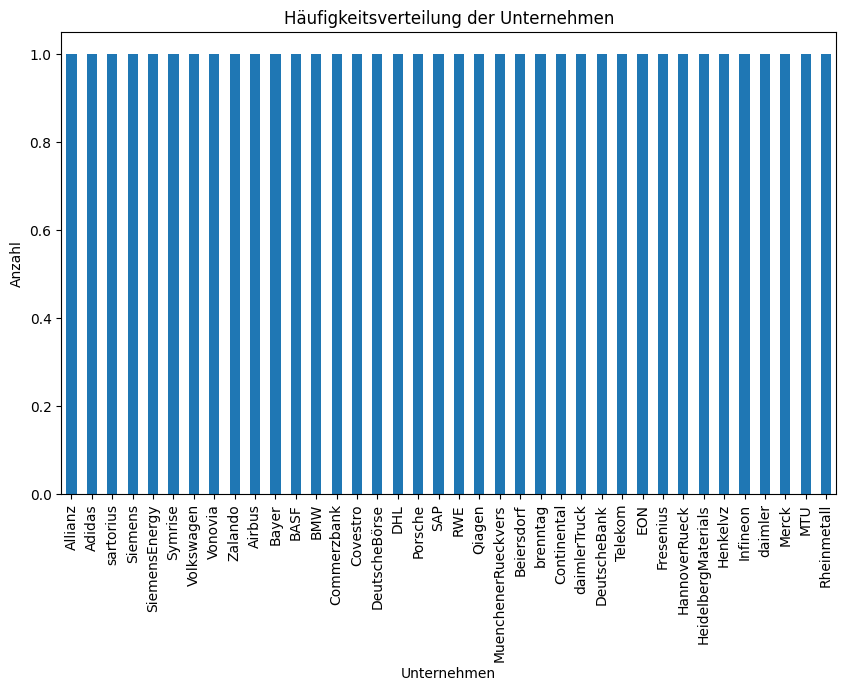

In [ ]:
import matplotlib.pyplot as plt

df_cleaned['company'].value_counts().plot(kind='bar', figsize=(10, 6))
plt.title('Häufigkeitsverteilung der Unternehmen')
plt.xlabel('Unternehmen')
plt.ylabel('Anzahl')
plt.show()


In [ ]:
print(df_cleaned['analysis_result'].head())


0    [{'cleaned_text': "  collaborating for a   sus...
1    [{'cleaned_text': "sustainability report     ....
2    [{'cleaned_text': "care   beyond   skin   crea...
3    [{'cleaned_text': "sustainability report   for...
4    [{'cleaned_text': "turn change into   opportun...
Name: analysis_result, dtype: object


In [ ]:
# Since the spacy model shows better results on the "raw" text, the named entity removal is conducted before all normalization and cleaning steps
spacy_model = spacy.load('en_core_web_md')
spacy_model.max_length = 1800000 # Increase max text length

def remove_named_entities(text):
    """
    Removes named entities from text and returns the modified text and the count of named entities removed.

    Args:
        text (str): The text to remove named entities from.

    Returns:
        tuple: A tuple containing the modified text (str) and the count of named entities removed (int).
    """
    doc = spacy_model(text)

    named_entities = set()
    for ent in doc.ents:
        if ent.label_ in ["PERSON"]:
            named_entities.add(ent.text)

    named_entities_count = len(named_entities)

    for named_entity in named_entities:
        text = text.replace(named_entity, '')

    return text, named_entities_count

# Assuming cleaned_data is a pandas DataFrame with a 'content' column
df_cleaned['cleaned_content'], name_entity_count = zip(*df_cleaned['content'].apply(remove_named_entities))
print("Name entities removed:", sum(name_entity_count))

Name entities removed: 4940


In [ ]:
def remove_urls(text):
    urls = re.findall(r'http\S+|www\S+|https\S+', text, flags=re.MULTILINE)
    return re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE), len(urls)

def remove_emails(text):
    mail_addresses = re.findall(r'\S+@\S+\s?', text, flags=re.MULTILINE)
    return re.sub(r'\S+@\S+\s?', '', text, flags=re.MULTILINE), len(mail_addresses)

def remove_extra_whitespace(text):
    extra_spaces = re.findall(r'\s{2,}', text)
    return re.sub(r'\s+', ' ', text).strip(), len(extra_spaces)

df_cleaned['cleaned_content'] = df_cleaned['cleaned_content'].astype(str) # Convert all texts to string
df_cleaned['cleaned_content'] = df_cleaned['cleaned_content'].apply(lambda x: x.lower()) # Convert all texts to lower-case
df_cleaned['cleaned_content'] = df_cleaned['cleaned_content'].apply(lambda x: unidecode(x, errors="preserve")) # Remove diacritics / accented characters and unicode normalization
df_cleaned['cleaned_content'], url_count = zip(*df_cleaned['cleaned_content'].apply(remove_urls)) # Remove URLs from texts
df_cleaned['cleaned_content'], email_count = zip(*df_cleaned['cleaned_content'].apply(remove_emails)) # Remove e-mail addresses from texts
df_cleaned['cleaned_content'], extra_space_count = zip(*df_cleaned['cleaned_content'].apply(remove_extra_whitespace)) # Remove extra whitespaces from texts

print("URLs removed:", sum(url_count))
print("Mail addresses removed:", sum(email_count))
print("Extra whitespaces removed:", sum(extra_space_count))

URLs removed: 395
Mail addresses removed: 197
Extra whitespaces removed: 13679


In [ ]:
def remove_contact_details(text):
    # Remove phone numbers
    phone_regex = r'[\+\(]?[1-9][0-9 .\-\(\)]{8,}[0-9]'
    phone_count = len(re.findall(phone_regex, text))
    text = re.sub(phone_regex, '', text)

    # Remove common contact-related phrases
    contact_phrases_regex = r'\b(?:Contact Person|Phone|Tel|Fax|Mobile|E?mail|Skype|Twitter|Facebook|LinkedIn|Website):\b'
    contact_phrases_count = len(re.findall(contact_phrases_regex, text, flags=re.IGNORECASE))
    text = re.sub(contact_phrases_regex, '', text, flags=re.IGNORECASE)

    total_count = phone_count + contact_phrases_count
    return text, total_count

def remove_table_of_contents(text):
    # Remove common table of contents phrases
    toc_phrases_regex = r'\b(?:Table of Contents|Contents)\b'
    toc_phrases_count = len(re.findall(toc_phrases_regex, text, flags=re.IGNORECASE))
    text = re.sub(toc_phrases_regex, '', text, flags=re.IGNORECASE)

    # Remove content with numbering like "1. Introduction", "1.1. Background", "A. Overview", etc.
    toc_entries_regex = r'(^|\n)\s*\w+(\.\w+)*\s+\w+([\w\s]+)?'
    toc_entries_count = len(re.findall(toc_entries_regex, text))
    text = re.sub(toc_entries_regex, '', text)

    total_count = toc_phrases_count + toc_entries_count
    return text, total_count

df_cleaned['cleaned_content'], contact_count = zip(*df_cleaned['cleaned_content'].apply(remove_contact_details))
df_cleaned['cleaned_content'], toc_count = zip(*df_cleaned['cleaned_content'].apply(remove_table_of_contents))
print("Contact information removed:", sum(contact_count))
print("TOCs removed:", sum(toc_count))

Contact information removed: 5137
TOCs removed: 305


In [ ]:
def expand_contractions(text):
    expanded_text = []
    for word in text.split():
        expanded_text.append(contractions.fix(word))
    expanded_text = ' '.join(expanded_text)
    return contractions.fix(expanded_text)

df_cleaned['cleaned_content'] = df_cleaned['cleaned_content'].apply(expand_contractions)

In [ ]:
# Expand custom abbreviations which are not captured by "contractions"
# Basic idea from: https://stackoverflow.com/questions/19790188/expanding-english-language-contractions-in-python
# Compile the regular expressions only once for efficiency
specific_patterns = [
    (re.compile(r"won['’]t"), "will not"),
    (re.compile(r"can['’]t"), "can not"),
]

def decontracted(phrase):
    """
    Expands contractions in a given phrase and returns the modified phrase and the count of contractions expanded.

    Args:
        phrase (str): The phrase to expand contractions in.

    Returns:
        tuple: A tuple containing the modified phrase (str) and the count of contractions expanded (int).
    """
    count = 0

    # Replace specific patterns
    for pattern, replacement in specific_patterns:
        matches = len(pattern.findall(phrase))
        count += matches
        phrase = pattern.sub(replacement, phrase)

    return phrase, count

# Apply the function to expand abbreviations
df_cleaned['cleaned_content'], abbreviation_counts = zip(*df_cleaned['cleaned_content'].apply(decontracted))
print("Expanded custom abbreviations:", sum(abbreviation_counts))

Expanded custom abbreviations: 0


In [ ]:
# Remove special characters excl. punctuation since this is needed by the sentence tokenization
def remove_non_alphanumeric(text, remove_punctuation=False):
    if remove_punctuation:
        pattern = r'[^a-zA-Z0-9\s]'
    else:
        pattern = r'[^a-zA-Z0-9\s.,!?\'"]'

    special_chars = re.findall(pattern, text)
    return re.sub(pattern, '', text), len(special_chars)

df_cleaned['cleaned_content'], special_char_count = zip(*df_cleaned['cleaned_content'].apply(remove_non_alphanumeric, remove_punctuation=False))
print("Special characters excl. punctuation removed:", sum(special_char_count))

Special characters excl. punctuation removed: 161614


In [ ]:
def tokenize_words(text):
    # Remove numbers, digits, and punctuation
    text = re.sub(r'\b\d+\b', '', text)
    text = re.sub(r'[^\w\s]', '', text)

    # Tokenize words
    tokens = word_tokenize(text)

    # Lemmatize words
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]

    return tokens, len(tokens)

df_cleaned['word_tokens'], word_token_count = zip(*df_cleaned['cleaned_content'].apply(tokenize_words))
print("Generated word token amount:", sum(word_token_count))

Generated word token amount: 1795518


In [ ]:
def tokenize_sentences(text):
    # Tokenize sentences
    tokens = sent_tokenize(text)

    return tokens, len(tokens)

df_cleaned['sentence_tokens'], sentence_token_count = zip(*df_cleaned['cleaned_content'].apply(tokenize_sentences))
print("Generated sentence token amount:", sum(sentence_token_count))

Generated sentence token amount: 67543


In [ ]:
cleaned_data = df_cleaned


In [ ]:
def remove_stopwords_from_word_tokens(tokens, custom_stopwords):
    """
    Removes stopwords and one-character tokens from a list of word tokens and returns the modified list and the count of removed items.

    Args:
        tokens (list): The list of word tokens to remove stopwords from.
        custom_stopwords (list): A list of custom stopwords to remove from the word tokens.

    Returns:
        tuple: A tuple containing the modified list of word tokens (list) and the count of removed items (int).
    """
    filtered_tokens = [
        token for token in tokens
        if token.lower() not in custom_stopwords and len(token) > 1
    ]

    return filtered_tokens, len(tokens) - len(filtered_tokens)

def remove_stopwords_from_sentence_tokens(sentences_list, custom_stopwords):
    """
    Removes stopwords, one-character tokens, digits, numbers, and special characters (excluding whitespace) from a list of sentence tokens and returns the modified list and the count of removed items.

    Args:
        sentences_list (list): The list of sentence tokens to remove stopwords from.
        custom_stopwords (list): A list of custom stopwords to remove from the sentence tokens.

    Returns:
        tuple: A tuple containing the modified list of sentence tokens (list) and the count of removed items (int).
    """
    filtered_sentences_list = []
    total_removed_items_count = 0

    for sentence in sentences_list:
        # Tokenize the sentence into words
        word_tokens = word_tokenize(sentence)

        # Remove stopwords, one-character tokens, digits, numbers, and special characters (excluding whitespace) from word tokens
        filtered_word_tokens = [
            re.sub(rf"[{re.escape(string.punctuation)}]", '', token) for token in word_tokens
            if token.lower() not in custom_stopwords
            and len(token) > 1
            and not re.search(r'\d', token)
            and not re.search(r'\W', token)
        ]

        # Reconstruct the sentence without the removed words and special characters
        filtered_sentence = ' '.join(filtered_word_tokens)
        removed_items_count = len(word_tokens) - len(filtered_word_tokens)
        filtered_sentences_list.append(filtered_sentence)
        total_removed_items_count += removed_items_count

    return filtered_sentences_list, total_removed_items_count

# Define custom stopwords to add or remove (the extra stopwords were identified by the TFIDF based wordcloud)
custom_stopwords = {
    'add': ['said','company','companies','year','billion','million','siemens','linde','rwe','volkswagen','symrise','porsche','sap','adidas','puma','airbus','bmw','hannover','mtu','heiderbergcement','qiagen','benz','continental','bayer','fresenius','wa', 'ha', 'eur', 'allianz', 'board'],
    'remove': [''] # Currently not needed
}

# Combine stopwords to filter the content of the reports
all_stopwords = set(stopwords.words('english'))
all_stopwords |= set(custom_stopwords['add'])
all_stopwords -= set(custom_stopwords['remove'])

cleaned_data['word_tokens'], stopword_count_words = zip(*cleaned_data['word_tokens'].apply(remove_stopwords_from_word_tokens, custom_stopwords=all_stopwords))
cleaned_data['sentence_tokens'], stopword_count_sentences = zip(*cleaned_data['sentence_tokens'].apply(remove_stopwords_from_sentence_tokens, custom_stopwords=all_stopwords))

print("Removed stopwords in word tokens", sum(stopword_count_words))
print("Removed stopwords in sentence tokens", sum(stopword_count_sentences))

Removed stopwords in word tokens 708397
Removed stopwords in sentence tokens 959438


In [ ]:
# Update the cleaned content based on the cleaned word tokens
cleaned_data['cleaned_content'] = cleaned_data['word_tokens'].apply(lambda x: ' '.join(x))

In [ ]:
def pos_tagging_tokens(word_tokens, sentence_list):
    """
    Performs POS tagging on a given list of word tokens and a list of sentence tokens and returns the POS tagged word tokens and POS tagged sentence tokens.

    Args:
        word_tokens (list): The list of word tokens to perform POS tagging on.
        sentence_list (list): The list of sentence tokens to perform POS tagging on.

    Returns:
        tuple: A tuple containing the POS tagged word tokens (list) and the POS tagged sentence tokens (list of lists).
    """

    # POS tagging for word tokens
    pos_tagged_word_tokens = nltk.pos_tag(word_tokens)

    # Create a dictionary to map word tokens to their POS tags, this reduces the effort to call nltk.pos_tag twice
    pos_tags_dict = dict(pos_tagged_word_tokens)

    # POS tagging for sentence tokens
    pos_tagged_sentence_list = []
    for sentence in sentence_list:
        tokenized_sentence = nltk.word_tokenize(sentence)
        pos_tagged_sentence = [(token, pos_tags_dict[token]) for token in tokenized_sentence if token in pos_tags_dict]
        pos_tagged_sentence_list.append(pos_tagged_sentence)

    return pos_tagged_word_tokens, pos_tagged_sentence_list

# Apply POS tagging
pos_tags = cleaned_data.apply(lambda row: pos_tagging_tokens(row['word_tokens'], row['sentence_tokens']), axis=1)
cleaned_data['pos_tagged_word_tokens'], cleaned_data['pos_tagged_sentence_tokens'] = zip(*pos_tags)

In [ ]:
# Create checkpoint file
cleaned_data = csv_checkpoint(cleaned_data, 'cleaned_data')

Saved DataFrame to cleaned_data.csv
Loaded DataFrame from cleaned_data.csv


In [ ]:
# Import necessary libraries
!pip install contractions langdetect requests nltk spacy
!pip install unidecode
import numpy as np
import pandas as pd  # library for data manipulation and analysis
import re  # library for regular expressions
import os  # library for operating system dependent functionality
import string  # library for string operations
import nltk  # library for natural language processing
import spacy  # library for advanced natural language processing
import requests  # library for making HTTP requests
import contractions  # library for expanding contractions
from langdetect import detect  # library for language detection
from nltk.corpus import stopwords  # library for stop words
from nltk.stem import WordNetLemmatizer  # library for lemmatizing words
from nltk.tokenize import word_tokenize, sent_tokenize  # libraries for tokenizing text
from unidecode import unidecode  # library for converting accented characters
from bs4 import BeautifulSoup  # library for parsing HTML and XML documents
from nltk.sentiment import SentimentIntensityAnalyzer  # library for sentiment analysis
nltk.download('vader_lexicon')  # download the VADER sentiment analysis lexicon
nltk.download('wordnet')  # download WordNet for lemmatization
nltk.download('stopwords')  # download stopwords for text preprocessing
nltk.download('punkt')  # download the Punkt tokenizer for sentence segmentation
nltk.download('maxent_ne_chunker')  # download the maximum entropy chunker for named entity recognition
nltk.download('averaged_perceptron_tagger')  # download the averaged perceptron tagger for part-of-speech tagging
nltk.download('words')  # download the NLTK corpus of words

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 21.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 31.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 16.1 MB/s eta 0:00:00
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993224 sha256=7d09135a30a97715ce864bae288d1fafc3c0b9034535f9c8f91b4f0bc527a29e
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 6.8 MB/s eta 0:00:00


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

In [ ]:
# Download a spacy model, can also be adjusted (medium = en_core_web_sm, large = en_core_web_lg)
!python -m spacy download en_core_web_md

2023-10-18 13:18:05.278352: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 MB 23.2 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')


# **Calculate Sentiment Value with Polarity Score**
As a last preprocessing step, the sentiment is calculated with the (quite basic) SentimentIntensityAnalyzer.

In [ ]:
sia = SentimentIntensityAnalyzer()
def get_sentiment_score(sentences):
    """
    Computes the sentiment score for a given list of sentences.

    Args:
        sentences (list): The sentences to compute the sentiment score for.

    Returns:
        float: The sentiment score of the text as a float between -1 and 1.
    """
    # Compute sentiment scores for each sentence and store them in a list
    sentiment_scores = [sia.polarity_scores(sentence)['compound'] for sentence in sentences]

    # Compute the average sentiment score
    avg_sentiment_score = np.mean(sentiment_scores) if sentiment_scores else 0

    return avg_sentiment_score

# Sentiment score calculation provided most "balanced" results with averaged sentence tokens. Therefore the sentiment is calculated on these texts.
cleaned_data['st1_sentiment_continuous'] = cleaned_data['sentence_tokens'].apply(get_sentiment_score)

In [ ]:
# Check NaN rows
cleaned_data[cleaned_data['cleaned_content'].isna()]

,company,content,datatype,date,domain,esg_topics,internal,symbol,title,url,analysis_result,cleaned_content,word_tokens,sentence_tokens,pos_tagged_word_tokens,pos_tagged_sentence_tokens,st1_sentiment_continuous


In [ ]:
# Drop NaN rows
cleaned_data = cleaned_data.dropna(subset=['cleaned_content'])

In [ ]:
# Save the dataframe as output
if not os.path.exists('./output/'):
    os.makedirs('./output/')

filename = 'stage1_output'

# Save DataFrame to CSV
cleaned_data.to_csv(f'./output/{filename}.csv', index=False, sep='|')
print(f'Saved DataFrame to {filename}.csv')

Saved DataFrame to stage1_output.csv


In [ ]:
# Drop NaN rows in 'cleaned_content'
cleaned_data = cleaned_data.dropna(subset=['cleaned_content'])

# Remove contact details and table of contents
cleaned_data['cleaned_content'], contact_count = zip(*cleaned_data['cleaned_content'].apply(remove_contact_details))
cleaned_data['cleaned_content'], toc_count = zip(*cleaned_data['cleaned_content'].apply(remove_table_of_contents))

# Drop NaN rows again after removing content
cleaned_data = cleaned_data.dropna(subset=['cleaned_content'])


In [ ]:
# Check the data after full preprocessing
cleaned_data.sample(10)

,company,content,datatype,date,domain,esg_topics,internal,symbol,title,url,analysis_result,cleaned_content,word_tokens,sentence_tokens,pos_tagged_word_tokens,pos_tagged_sentence_tokens,st1_sentiment_continuous
26,Vonovia,VONOVIA SE\nSUSTAINABILITY REPORT 2020\nWhat D...,sustainability_report,2020,NaN,[],1,VON,Vonovia Sustainability Report 2020,NaN,"[{'cleaned_text': "" sustainability report w...",,"['statt', 'oder', 'sustainability', 'report', ...",['statt oder sustainability report dear reader...,"[('statt', 'JJ'), ('oder', 'JJR'), ('sustainab...","[[('statt', 'JJ'), ('oder', 'JJR'), ('sustaina...",0.0
20,SAP,About This Report\nContent The reporting perio...,sustainability_report,2020,NaN,[],1,SAP,SAP Sustainability Report 2020,NaN,"[{'cleaned_text': ""about this report content...",,"['report', 'encompasses', 'se', 'subsidiary', ...","['', 'report encompasses se subsidiaries group...","[('report', 'NN'), ('encompasses', 'VBZ'), ('s...","[[], [('report', 'NN'), ('encompasses', 'VBZ')...",0.0
34,DeutscheBörse,Deutsche Börse Group | Annual report 2020\nExe...,sustainability_report,2020,NaN,[],1,DEU,DeutscheBörse Sustainability Report 2020,NaN,"[{'cleaned_text': "" report executive and su...",,"['annual', 'report', 'executive', 'supervisory...",['annual report executive supervisory boards m...,"[('annual', 'JJ'), ('report', 'NN'), ('executi...","[[('annual', 'JJ'), ('report', 'NN'), ('execut...",0.0
19,RWE,New ways for\na sustainable future.\nSustainab...,sustainability_report,2020,NaN,[],1,RWE,RWE Sustainability Report 2020,NaN,"[{'cleaned_text': ""new ways for a sustainabl...",,"['sustainability', 'report', 'rwecomour', 'ene...","['', 'sustainability report energy sustainable...","[('sustainability', 'NN'), ('report', 'NN'), (...","[[], [('sustainability', 'NN'), ('report', 'NN...",0.0
4,Continental,TURN CHANGE INTO\nOPPORTUNITY –\nEMBRACE SUSTA...,sustainability_report,2020,NaN,[],1,CON,Continental Sustainability Report 2020,NaN,"[{'cleaned_text': ""turn change into opportun...",,"['embrace', 'sustainability', 'integrated', 's...",['embrace sustainability integrated sustainabi...,"[('embrace', 'NN'), ('sustainability', 'NN'), ...","[[('embrace', 'NN'), ('sustainability', 'NN'),...",0.0
17,MuenchenerRueckvers,Corporate\nResponsibility\nReport 20202\nTable...,sustainability_report,2020,NaN,[],1,MUE,MuenchenerRueckvers Sustainability Report 2020,NaN,"[{'cleaned_text': ""corporate responsibility ...",,"['bold', 'target', 'emission', 'portrait', 'lo...",['bold targets emissions portrait lowering env...,"[('bold', 'JJ'), ('target', 'NN'), ('emission'...","[[('bold', 'JJ'), ('portrait', 'NN'), ('loweri...",0.0
35,DHL,COMBINED MANAGEMENT REPORT NON-FINANCIAL STATE...,sustainability_report,2020,NaN,[],1,DHL,DHL Sustainability Report 2020,NaN,"[{'cleaned_text': ""combined management report ...",,"['financial', 'statement', 'deutsche', 'post',...",['financial statement deutsche post dhl group ...,"[('financial', 'JJ'), ('statement', 'NN'), ('d...","[[('financial', 'JJ'), ('statement', 'NN'), ('...",0.0
29,Airbus,Overview / Sustainability 13\nSustainability\n...,sustainability_report,2020,NaN,[],1,AIR,Airbus Sustainability Report 2020,NaN,"[{'cleaned_text': ""overview sustainability ...",,"['overview', 'sustainability', 'sustainability...",['overview sustainability sustainability commi...,"[('overview', 'NN'), ('sustainability', 'NN'),...","[[('overview', 'NN'), ('sustainability', 'NN')...",0.0
15,Merck,Sustainability ReportMerck Sustainability Repo...,sustainability_report,2020,NaN,[],1,MER,Merck Sustainability Report 2020,NaN,"[{'cleaned_text': ""sustainability reportmerck ...",,"['eemmppllooyyeeeess', 'profile', 'good', 'lea...",['eemmppllooyyeeeess profile good leadership s...,"[('eemmppllooyyeeeess', 'RB'), ('profile', 'RB...","[[('eemmppllooyyeeeess', 'JJ'), ('profile', 'N...",0.0
9,Fresenius,To our shareholders Group Management Report Gr...,sustainability_report,2020,NaN,[],1,FRE,Fresenius Sustainability Report 2020,NaN,"[{'cleaned

In [ ]:
zero_sentiment_texts = cleaned_data.loc[cleaned_data['st1_sentiment_continuous'] == 0, 'cleaned_content']
for idx, text in zero_sentiment_texts.sample(5).iteritems():
    print(f"Index: {idx}\n{text}\n{'='*50}\n")


Index: 31


Index: 0


Index: 21


Index: 28


Index: 9




<ipython-input-49-504f6e4b718b>:2: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for idx, text in zero_sentiment_texts.sample(5).iteritems():
